## Importar librerias a utilizar

In [1]:
# Manipulacion de datos
import pandas as pd
import numpy as np

# Graficos
import matplotlib.pyplot as plt
import seaborn as sns

# MODELOS
import sklearn as skt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, ElasticNetCV, LassoCV # para regresion lineal multiple y regularizacion
from sklearn.linear_model import SGDRegressor # para gradientes
from sklearn.linear_model import LogisticRegression # regresion logistica

# Redes Neuronales
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import KFold

# split y pipeline para entrenamiento de modelos
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# Metricas de los modelos
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Escalado de datos
from sklearn.preprocessing import RobustScaler # pruebas
from sklearn.preprocessing import StandardScaler # usado

# Balance de modelos
from imblearn.over_sampling import RandomOverSampler, SMOTE

# ignorar warnings
import warnings
warnings.filterwarnings("ignore")

## Lectura del dataset y primer analisis

In [2]:
df = pd.read_csv("/content/weatherAUS.csv", delimiter=",")

In [ ]:
df.head()

Unnamed: 0        Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0           0  2008-12-01   Albury     13.4     22.9       0.6          NaN   
1           1  2008-12-02   Albury      7.4     25.1       0.0          NaN   
2           2  2008-12-03   Albury     12.9     25.7       0.0          NaN   
3           3  2008-12-04   Albury      9.2     28.0       0.0          NaN   
4           4  2008-12-05   Albury     17.5     32.3       1.0          NaN   

   Sunshine WindGustDir  WindGustSpeed  ... Humidity3pm Pressure9am  \
0       NaN           W           44.0  ...        22.0      1007.7   
1       NaN         WNW           44.0  ...        25.0      1010.6   
2       NaN         WSW           46.0  ...        30.0      1007.6   
3       NaN          NE           24.0  ...        16.0      1017.6   
4       NaN           W           41.0  ...        33.0      1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0       1007.1       8.0       NaN     16.9     21.8         No            No   
1       1007.8       NaN       NaN     17.2     24.3         No            No   
2       1008.7       NaN       2.0     21.0     23.2         No            No   
3       1012.8       NaN       NaN     18.1     26.5         No            No   
4       1006.0       7.0       8.0     17.8     29.7         No            No   

   RainfallTomorrow  
0               0.0  
1               0.0  
2               0.0  
3               1.0  
4               0.2  

[5 rows x 25 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145412 entries, 0 to 145411
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        145412 non-null  int64  
 1   Date              145412 non-null  object 
 2   Location          145412 non-null  object 
 3   MinTemp           143928 non-null  float64
 4   MaxTemp           144159 non-null  float64
 5   Rainfall          142152 non-null  float64
 6   Evaporation       82658 non-null   float64
 7   Sunshine          75616 non-null   float64
 8   WindGustDir       135096 non-null  object 
 9   WindGustSpeed     135159 non-null  float64
 10  WindDir9am        134850 non-null  object 
 11  WindDir3pm        141186 non-null  object 
 12  WindSpeed9am      143645 non-null  float64
 13  WindSpeed3pm      142351 non-null  float64
 14  Humidity9am       142759 non-null  float64
 15  Humidity3pm       140907 non-null  float64
 16  Pressure9am       13

In [3]:
#-----------# Filtrado de localidad y eliminacion de columna Unnamed: 0#-----------#

localidades = ["SydneyAirport", "Sydney", "Canberra", "Melbourne", "MelbourneAirport" ]

# Filtrado del dataset por localidad SydneyAirport
df_filtrado = df[df['Location'].isin(localidades)]

# Eliminar la columna 'Unnamed: 0'
df_filtrado = df_filtrado.drop('Unnamed: 0', axis=1)

df_filtrado.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
30167  2008-02-01   Sydney     19.5     22.4      15.6          6.2       0.0   
30168  2008-02-02   Sydney     19.5     25.6       6.0          3.4       2.7   
30169  2008-02-03   Sydney     21.6     24.5       6.6          2.4       0.1   
30170  2008-02-04   Sydney     20.2     22.8      18.8          2.2       0.0   
30171  2008-02-05   Sydney     19.7     25.7      77.4          NaN       0.0   

      WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
30167         NaN            NaN          S  ...        84.0       1017.6   
30168         NaN            NaN          W  ...        73.0       1017.9   
30169         NaN            NaN        ESE  ...        86.0       1016.7   
30170         NaN            NaN        NNE  ...        90.0       1014.2   
30171         NaN            NaN        NNE  ...        74.0       1008.3   

       Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
30167       1017.4       8.0       8.0     20.7     20.9        Yes   
30168       1016.4       7.0       7.0     22.4     24.8        Yes   
30169       1015.6       7.0       8.0     23.5     23.0        Yes   
30170       1011.8       8.0       8.0     21.4     20.9        Yes   
30171       1004.8       8.0       8.0     22.5     25.5        Yes   

       RainTomorrow  RainfallTomorrow  
30167           Yes               6.0  
30168           Yes               6.6  
30169           Yes              18.8  
30170           Yes              77.4  
30171           Yes               1.6  

[5 rows x 24 columns]

In [ ]:
df_filtrado.describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  15495.000000  15500.000000  15199.000000  14280.000000  14038.000000   
mean      11.605221     21.751781      2.303744      4.866828      6.854694   
std        5.851347      6.053679      7.385992      3.069869      3.842419   
min       -8.000000      4.100000      0.000000      0.000000      0.000000   
25%        7.900000     17.100000      0.000000      2.600000      3.700000   
50%       11.600000     21.300000      0.000000      4.200000      7.500000   
75%       15.800000     25.800000      0.800000      6.600000     10.000000   
max       30.500000     46.800000    119.400000     23.800000     13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   14531.000000  15725.000000  15737.000000  15416.000000  15461.000000   
mean       44.417315     16.613672     21.797166     68.903023     51.280577   
std        14.958027     10.336386      9.518033     15.614788     17.721335   
min        11.000000      0.000000      0.000000     11.000000      3.000000   
25%        33.000000      9.000000     15.000000     59.000000     39.000000   
50%        43.000000     15.000000     20.000000     70.000000     51.000000   
75%        54.000000     22.000000     28.000000     80.000000     62.000000   
max       122.000000     69.000000     76.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  15251.000000  15260.000000  13309.000000  13054.000000  15481.000000   
mean    1018.305836   1016.064239      4.750545      4.746131     15.545953   
std        7.400730      7.265386      2.728329      2.589879      5.559295   
min      986.700000    985.500000      0.000000      0.000000     -1.300000   
25%     1013.400000   1011.200000      2.000000      2.000000     11.600000   
50%     1018.500000   1016.300000      6.000000      6.000000     15.400000   
75%     1023.300000   1021.000000      7.000000      7.000000     19.500000   
max     1040.600000   1037.900000      9.000000      8.000000     37.200000   

            Temp3pm  RainfallTomorrow  
count  15490.000000      15199.000000  
mean      20.229154          2.302586  
std        5.857956          7.385251  
min        3.700000          0.000000  
25%       15.900000          0.000000  
50%       19.800000          0.000000  
75%       24.100000          0.800000  
max       46.100000        119.400000

Objetivo

Familiarizarse con la librería scikit-learn y las herramientas que brinda para el pre-procesamiento de datos, la implementación de modelos y la evaluación de métricas, y con TensorFlow para el entrenamiento de redes neuronales.

Dataset

El dataset se llama weatherAUS.csv y contiene información climática de Australia de los últimos diez años, incluyendo si para el día siguiente llovió o no y la cantidad de lluvia en las columnas ‘RainTomorrow’ y ‘RainfallTomorrow’. El objetivo es la predicción de estas dos variables en función del resto de las características que se consideren adecuadas.

Tiene una columna ‘Location’ que indica la ciudad y el objetivo es predecir la condición de lluvia en las ciudades de Sydney, SydneyAirport, Canberra, Melbourne y MelbourneAirport (costa sureste). Pueden considerarse como una única ubicación. Descartar el resto de los datos.


## Tratamiento de datos faltantes

In [4]:
# Verificar cantidad de datos que faltan por columnas
df_filtrado.isna().sum()

Date                   0
Location               0
MinTemp               11
MaxTemp                5
Rainfall              29
Evaporation         1700
Sunshine            1946
WindGustDir         1428
WindGustSpeed       1426
WindDir9am           605
WindDir3pm           265
WindSpeed9am         258
WindSpeed3pm         249
Humidity9am           80
Humidity3pm           29
Pressure9am          255
Pressure3pm          243
Cloud9am            1643
Cloud3pm            1825
Temp9am               24
Temp3pm               12
RainToday             29
RainTomorrow          29
RainfallTomorrow      29
dtype: int64

In [5]:
#------------# Aplicacion de medidas para datos faltantes #------------#

# Eliminar filas vacias del dataframe RainTomorrow y RainfallTomorrow
df_filtrado = df_filtrado.dropna(subset=['RainTomorrow', 'RainfallTomorrow'])

"""
Explicacion:
RainTomorrow y RainfallTomorrow son variables que queremos predecir por eso al tener datos
faltantes no podemos inventarnos valores o repetirlos, debemos eliminar esas filas ya que no
hay forma de rellenarlos.
"""

df_filtrado.isna().sum()

Date                   0
Location               0
MinTemp                9
MaxTemp                5
Rainfall              26
Evaporation         1691
Sunshine            1937
WindGustDir         1416
WindGustSpeed       1414
WindDir9am           600
WindDir3pm           265
WindSpeed9am         257
WindSpeed3pm         249
Humidity9am           77
Humidity3pm           29
Pressure9am          252
Pressure3pm          242
Cloud9am            1635
Cloud3pm            1814
Temp9am               22
Temp3pm               12
RainToday             26
RainTomorrow           0
RainfallTomorrow       0
dtype: int64

In [6]:
# Crear funcion para rellenar datos segun corresponda
def rellenar(dataframe):

    for columna in dataframe.columns:

        # Verifica si la columna tiene datos faltantes
        if dataframe[columna].isnull().any():

            # Si es numérica y continua, rellena con el promedio
            if pd.api.types.is_numeric_dtype(dataframe[columna]) and not pd.api.types.is_integer_dtype(dataframe[columna]):
                dataframe[columna].fillna(dataframe[columna].mean(), inplace=True)

            # Si es numérica y discreta, rellena con la moda
            elif pd.api.types.is_numeric_dtype(dataframe[columna]):
                dataframe[columna].fillna(dataframe[columna].mode()[0], inplace=True)

           # Si es categórica, rellena con la moda
            else:
                dataframe[columna].fillna(dataframe[columna].mode()[0], inplace=True)

    return dataframe

In [7]:
# Rellena columnas
df1 = rellenar(df_filtrado)

# Reiniciar index
df1 =  df1.reset_index(drop = True)

df1.isna().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
RainfallTomorrow    0
dtype: int64

## Analisis descriptivo

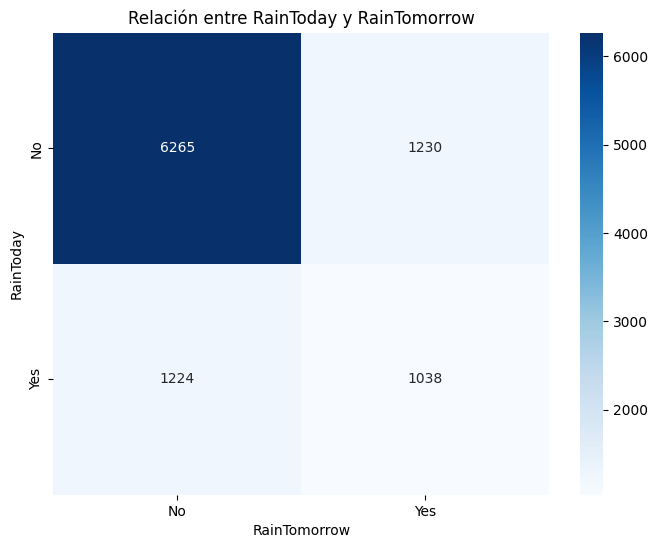

In [8]:
# Guarda las columnas categóricas y numericas
columnas_categoricas = df1.select_dtypes(exclude='number').columns
columnas_numericas = df1.select_dtypes(include='number').columns


# Ver influencia de RainToday en RainTomorrow
# Crear una tabla de contingencia
contingency_table = pd.crosstab(df1['RainToday'], df1['RainTomorrow'])

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear un heatmap de la tabla de contingencia
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')

# Ajustes de diseño
plt.title('Relación entre RainToday y RainTomorrow')
plt.xlabel('RainTomorrow')
plt.ylabel('RainToday')

plt.show()

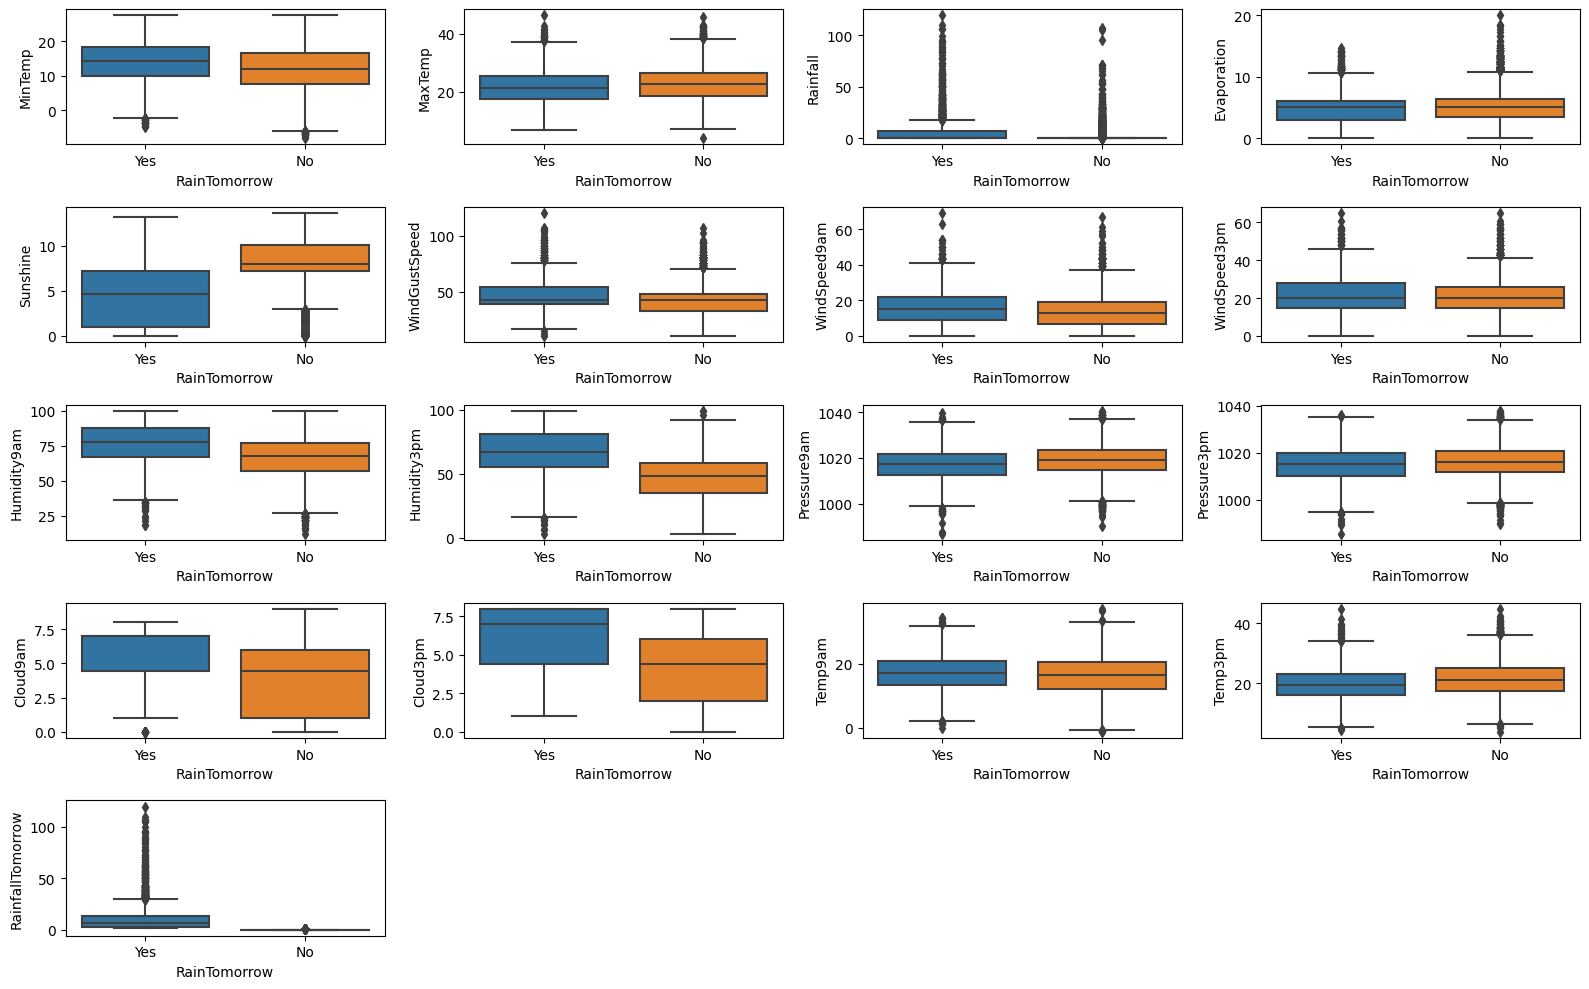

In [9]:
#Gráfico de Boxplot
# Configurar el tamaño de la figura
plt.figure(figsize=(16, 10))

# Crear subgráficos de cajas para cada variable numérica
for i, column in enumerate(columnas_numericas):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x='RainTomorrow', y=column, data=df1)

# Ajustes de diseño
plt.tight_layout()
plt.show()

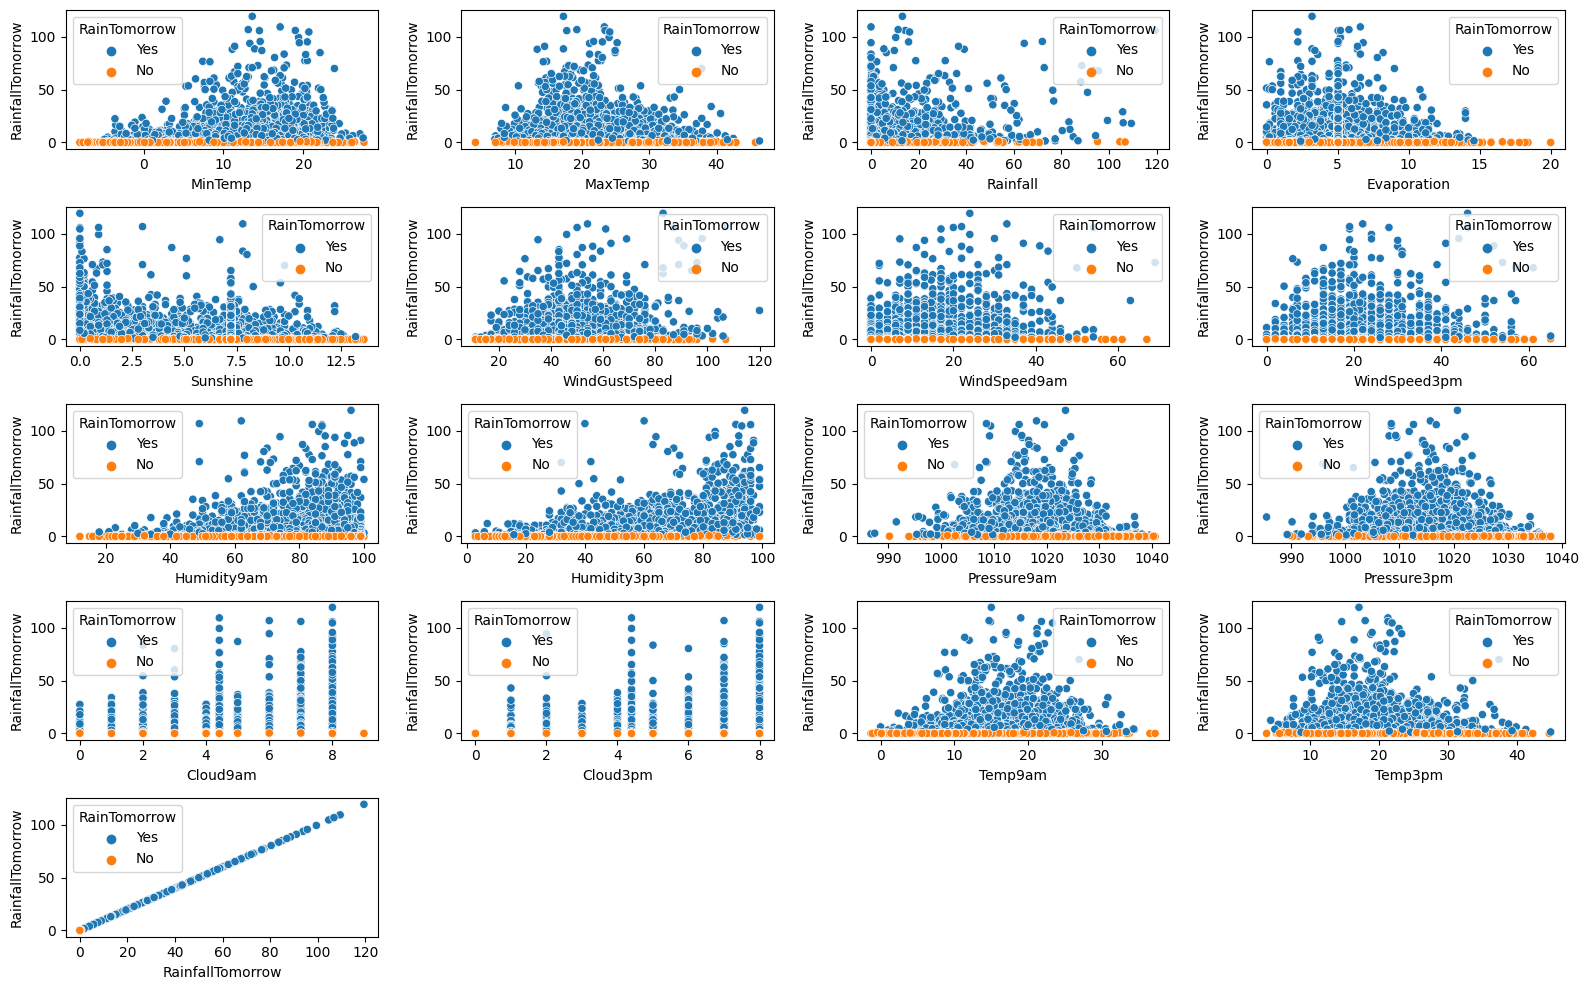

In [10]:
# Configurar el tamaño de la figura
plt.figure(figsize=(16, 10))

# Crear subgráficos de disperción para cada variable numérica
for i, column in enumerate(columnas_numericas):
    plt.subplot(5, 4, i+1)
    sns.scatterplot(x=column,y='RainfallTomorrow',hue='RainTomorrow', data=df1)

# Ajustes de diseño
plt.tight_layout()
plt.show()

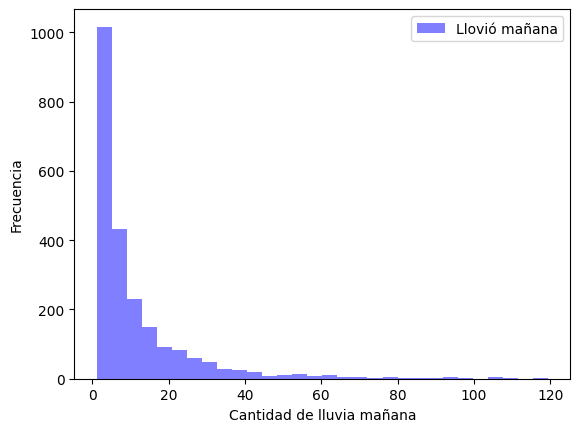

In [11]:
# Crear un histograma para la columna 'RainTomorrow'
plt.hist(df1[df1['RainTomorrow'] == 'Yes']['RainfallTomorrow'], bins=30, alpha=0.5, label='Llovió mañana', color='blue')

# Añadir etiquetas y leyenda
plt.xlabel('Cantidad de lluvia mañana')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el histograma
plt.show()

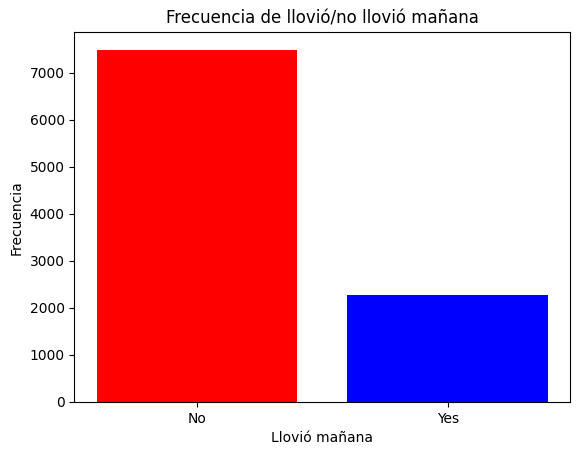

In [12]:
# Contar la frecuencia de 'RainTomorrow'
conteo_lluvia = df1['RainTomorrow'].value_counts()

# Crear un gráfico de barras
plt.bar(conteo_lluvia.index, conteo_lluvia, color=['red', 'blue'])

# Añadir etiquetas y título
plt.xlabel('Llovió mañana')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de llovió/no llovió mañana')

# Mostrar el gráfico de barras
plt.show()

## Paso de columnas categoricas a numericas

In [15]:
df_categorica=df1.copy()


In [16]:
from sklearn.preprocessing import LabelEncoder

# Aplicar codificación de etiqueta

le = LabelEncoder()
for categorica in columnas_categoricas:
 df_categorica[categorica] = le.fit_transform(df_categorica[categorica])

df_categorica.head()

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0    92         1     19.5     22.4      15.6     6.200000       0.0   
1    93         1     19.5     25.6       6.0     3.400000       2.7   
2    94         1     21.6     24.5       6.6     2.400000       0.1   
3    95         1     20.2     22.8      18.8     2.200000       0.0   
4    96         1     19.7     25.7      77.4     5.034825       0.0   

   WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity3pm  Pressure9am  \
0            7      43.071557           8  ...         84.0       1017.6   
1            7      43.071557          13  ...         73.0       1017.9   
2            7      43.071557           2  ...         86.0       1016.7   
3            7      43.071557           5  ...         90.0       1014.2   
4            7      43.071557           5  ...         74.0       1008.3   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0       1017.4       8.0       8.0     20.7     20.9          1             1   
1       1016.4       7.0       7.0     22.4     24.8          1             1   
2       1015.6       7.0       8.0     23.5     23.0          1             1   
3       1011.8       8.0       8.0     21.4     20.9          1             1   
4       1004.8       8.0       8.0     22.5     25.5          1             1   

   RainfallTomorrow  
0               6.0  
1               6.6  
2              18.8  
3              77.4  
4               1.6  

[5 rows x 24 columns]

##Matriz de correlación

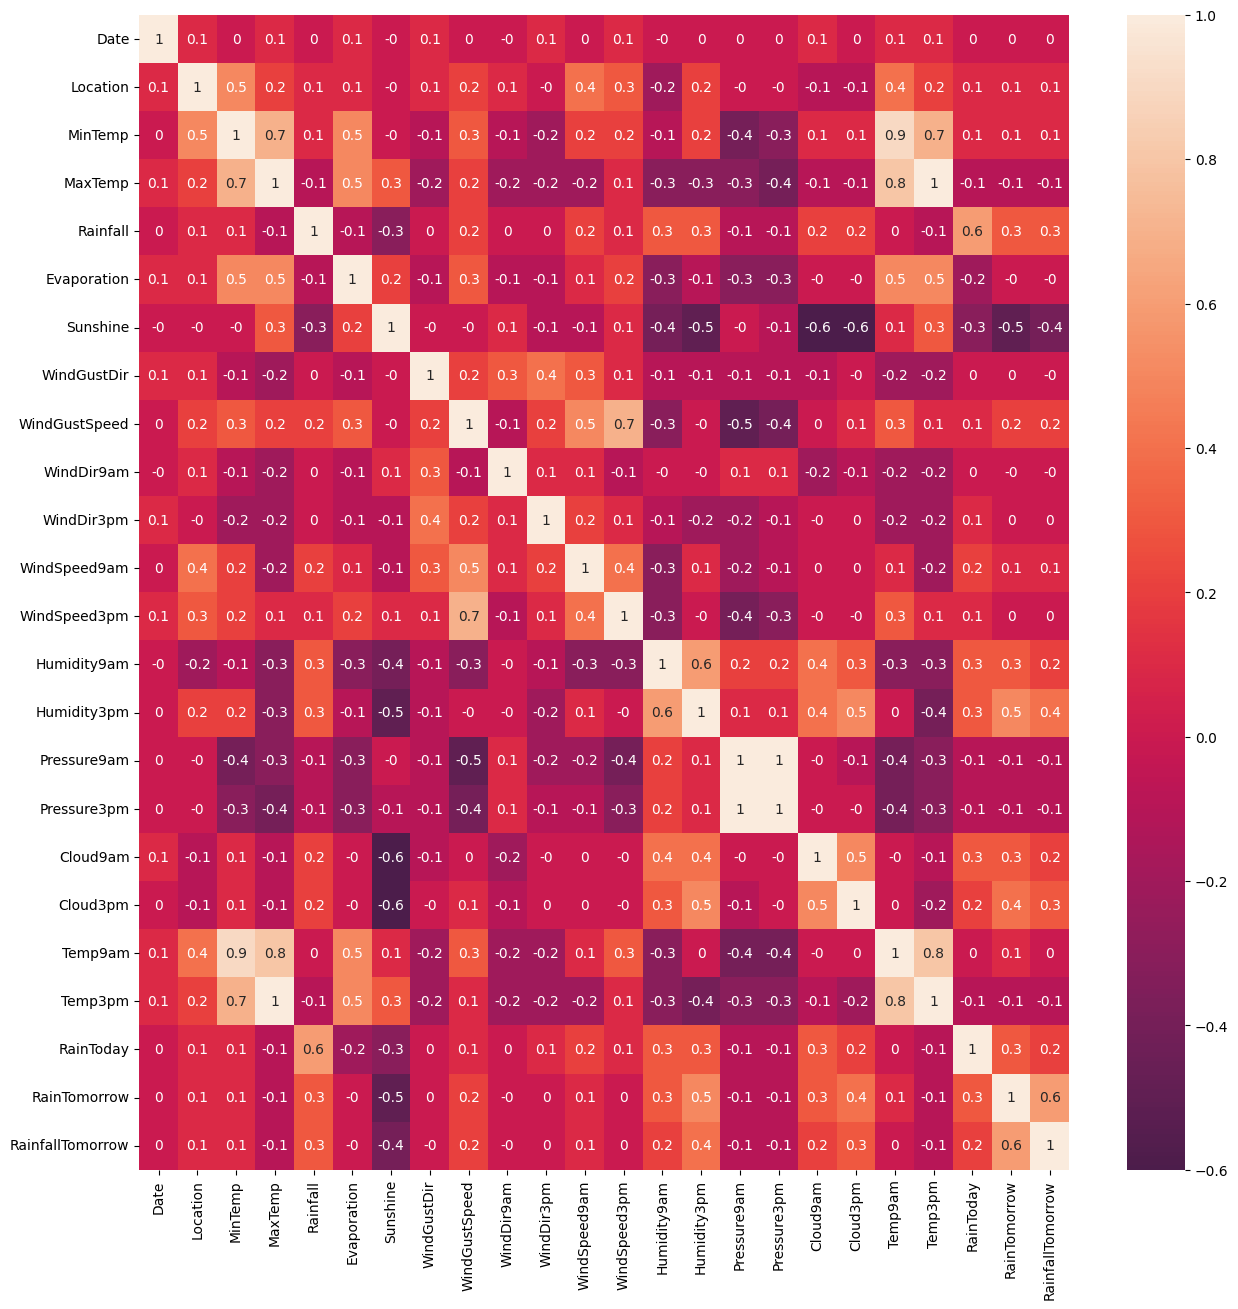

In [17]:
corr = df_categorica.corr().round(1)
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap="rocket", center=0)
plt.show()

## Seleccción de caracteristicas para la regresión

Utilizaremos todos los datos ya que requiere un costo obtener los mismos y son limitados.

# Implementar la solución del problema de regresión con regresión lineal múltiple

## LinearRegression

In [19]:
#------------# Estandarizacion de datos #------------#

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Filtrar el DataFrame con las columnas seleccionadas
df_regresion = df_categorica.drop(['RainTomorrow', 'RainfallTomorrow'], axis=1)

# Ajustar el scaler a los datos y transformarlos
df_regresion = pd.DataFrame(scaler.fit_transform(df_regresion), columns=df_regresion.columns)

Error cuadrático medio en entrenamiento: 53.84706333043687
Error cuadrático medio en predicciones: 51.70419430067285
Error absoluto medio en predicciones: 3.6982114990727424
Intercept: [2.71559816]
Coeficientes: [[ 0.0763732  -0.26067706 -0.44242991  0.26448873  1.52802363  0.02745977
  -1.71054376 -0.22239573  1.79863282  0.11807749  0.41315705  0.17362792
  -0.71263018 -0.69906573  3.38980268  2.55815994 -2.64738991 -0.43357594
   0.06136068 -0.80406478  1.26507981  0.11798946]]
R2: 0.2120079421720238


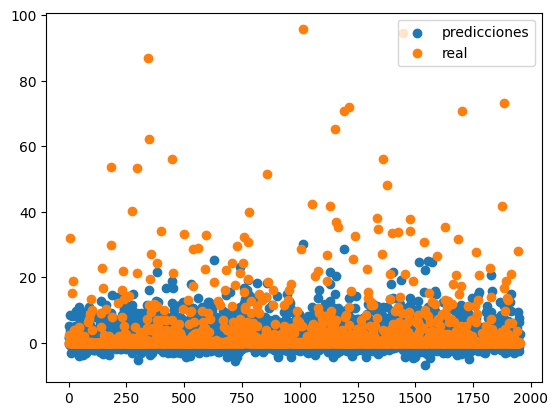

In [20]:
# Dividir los datos en conjunto de entrenamiento y de prueba
X_train, X_test, Y_train, Y_test = train_test_split(
    df_regresion,
    df_categorica['RainfallTomorrow'].values.reshape(-1, 1),
    test_size=0.2,
    random_state=12)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, Y_train)

# Hacer predicciones sobre el conjunto de prueba
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

# Evaluar el modelo
print('Error cuadrático medio en entrenamiento:', metrics.mean_squared_error(Y_train, predictions_train))
print('Error cuadrático medio en predicciones:', metrics.mean_squared_error(Y_test, predictions_test))
print('Error absoluto medio en predicciones:', mean_absolute_error(Y_test, predictions_test))
print('Intercept:', model.intercept_)
print('Coeficientes:', model.coef_)
print('R2:', model.score(X_test, Y_test))

x=range(len(Y_test))
plt.scatter(x, y=predictions_test, label='predicciones')
plt.scatter(x, y=Y_test, label='real')
plt.legend()
plt.show()

# metodos de gradiente

Error cuadrático medio en entrenamiento: 40.96659432893721
Error cuadrático medio en predicciones: 48.73084190849909
Error absoluto medio en predicciones: 3.220956577023552
Intercept: [2.24684929]
Coeficientes: [-0.03278692  0.16196844 -0.56916688  0.62970758  1.18765999  0.20359573
 -1.1042666  -0.15927452  1.55097027  0.11335475  0.19358708 -0.1675121
 -0.642958   -0.14710481  2.67011781  2.01698115 -2.0192479  -0.30457923
  0.15295522 -0.06103461  0.75203685  0.21615824]
R2: 0.2418854617281192


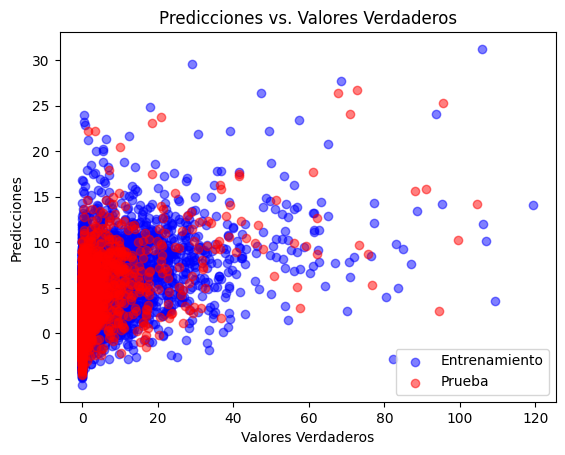

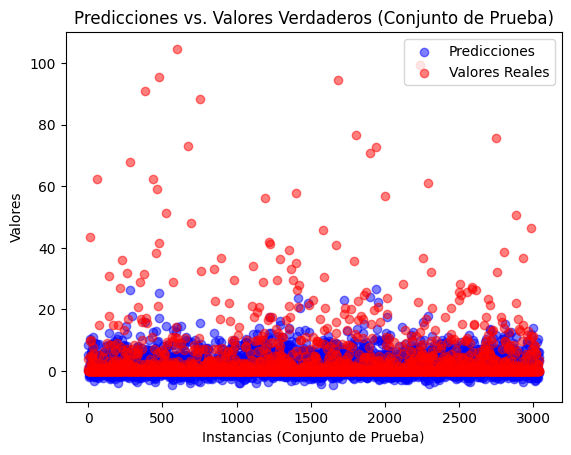

In [ ]:
# metodo de gradiente estocaico por SGDRegressor
"""
Este modelo de regresion lineal ya implementa de forma interna el gradiente estocaico
"""
# Dividir los datos en conjunto de entrenamiento y de prueba
X_train, X_test, Y_train, Y_test = train_test_split(
    df_regresion,
    df_categorica['RainfallTomorrow'].values.reshape(-1, 1),
    test_size=0.2,
    random_state=12)

# Crear y entrenar el modelo de regresión lineal con SGD
model = SGDRegressor(learning_rate='invscaling', eta0=0.01, max_iter=1000, random_state=42)
#model = SGDRegressor(learning_rate='constant', eta0=0.001, max_iter=1500, random_state=42)
#model = SGDRegressor(learning_rate='adaptive',  max_iter=2500, random_state=42)
model.fit(X_train, Y_train)

# Hacer predicciones en los conjuntos de entrenamiento y prueba
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

# Evaluar el modelo
print('Error cuadrático medio en entrenamiento:', metrics.mean_squared_error(Y_train, predictions_train))
print('Error cuadrático medio en predicciones:', metrics.mean_squared_error(Y_test, predictions_test))
print('Error absoluto medio en predicciones:', mean_absolute_error(Y_test, predictions_test))
print('Intercept:', model.intercept_)
print('Coeficientes:', model.coef_)
print('R2:', model.score(X_test, Y_test))

# Visualizar predicciones vs. valores reales con colores diferentes
plt.scatter(Y_train, predictions_train, label='Entrenamiento', color='blue', alpha=0.5)
plt.scatter(Y_test, predictions_test, label='Prueba', color='red', alpha=0.5)
plt.xlabel('Valores Verdaderos')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Verdaderos')
plt.legend()
plt.show()


x_test = range(len(Y_test))

plt.scatter(x_test, predictions_test, label='Predicciones', color='blue', alpha=0.5)
plt.scatter(x_test, Y_test, label='Valores Reales', color='red', alpha=0.5)

plt.xlabel('Instancias (Conjunto de Prueba)')
plt.ylabel('Valores')
plt.title('Predicciones vs. Valores Verdaderos (Conjunto de Prueba)')
plt.legend()
plt.show()


# R2: 0.2418854617281192 learning_rate='invscaling', eta0=0.01, max_iter=1000, random_state=42
# R2: 0.24197630208614485 learning_rate='constant', eta0=0.001, max_iter=1500, random_state=42
# R2: 0.24114837573788284 learning_rate='adaptive',  max_iter=2500, random_state=42

In [ ]:
df_regresion.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

R2 Score (entrenamiento): 0.21524427164984494
R2 Score (prueba): 0.2400809447186999
MSE (entrenamiento): 40.88723770234051
MSE (prueba): 48.84683445140383
RMSE (entrenamiento): 6.394312918706786
RMSE (prueba): 6.989051040835503
MAE (entrenamiento): 3.1049067132951063
MAE (prueba): 3.1904185399285248
MAPE (entrenamiento): inf
MAPE (prueba): inf


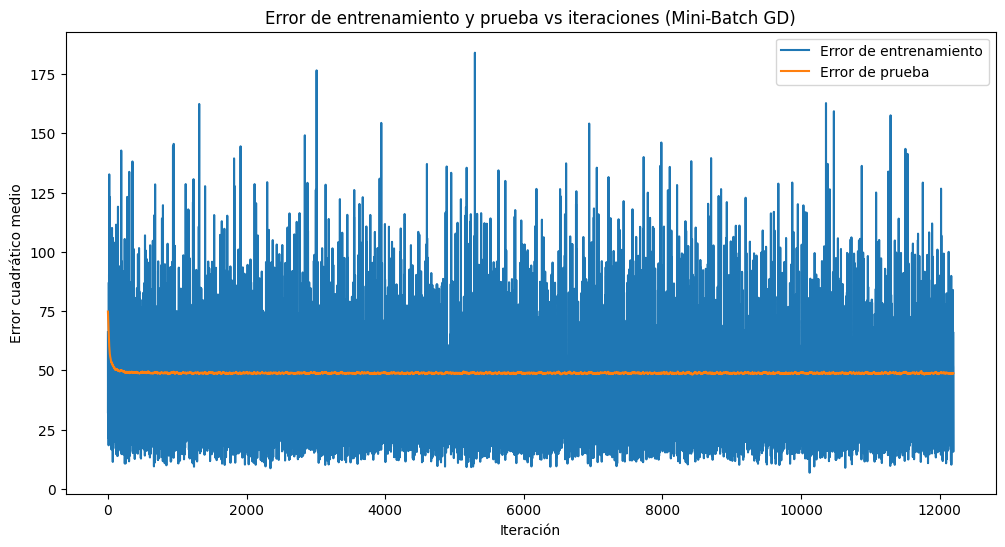

array([[ 2.31030036],
       [ 0.05284684],
       [ 0.06028175],
       [-0.59888724],
       [ 0.59552877],
       [ 1.08723781],
       [ 0.17698922],
       [-1.09945666],
       [-0.0935849 ],
       [ 1.56079331],
       [ 0.17768693],
       [ 0.2708011 ],
       [-0.09016001],
       [-0.67658394],
       [-0.23595199],
       [ 2.64615471],
       [ 2.00974269],
       [-2.10683879],
       [-0.29201583],
       [ 0.15039634],
       [-0.08120619],
       [ 0.69447084],
       [ 0.14760877]])

In [ ]:
def mini_batch_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100, batch_size=11):
    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):

        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]

        for j in range(0, n, batch_size):
            # Obtener un lote (mini-batch) de datos
            x_batch = X_train[j:j+batch_size, :]
            y_batch = y_train[j:j+batch_size].reshape(-1, 1)

            prediction = np.matmul(x_batch, W)
            error = y_batch - prediction
            train_mse = np.mean(error ** 2)
            train_errors.append(train_mse)

            gradient = -2 * np.matmul(x_batch.T, error) / batch_size

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

    # Métricas de evaluación
    y_train_pred = np.matmul(X_train, W)
    y_test_pred = np.matmul(X_test, W)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

    print(f'R2 Score (entrenamiento): {r2_train}')
    print(f'R2 Score (prueba): {r2_test}')
    print(f'MSE (entrenamiento): {mse_train}')
    print(f'MSE (prueba): {mse_test}')
    print(f'RMSE (entrenamiento): {rmse_train}')
    print(f'RMSE (prueba): {rmse_test}')
    print(f'MAE (entrenamiento): {mae_train}')
    print(f'MAE (prueba): {mae_test}')
    print(f'MAPE (entrenamiento): {mape_train}')
    print(f'MAPE (prueba): {mape_test}')

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (Mini-Batch GD)')
    plt.show()

    return W

# Utilizar el método con tus datos
mini_batch_gradient_descent(X_train, Y_train, X_test, Y_test, lr=0.01, epochs=200, batch_size= 200)



# regularizacion

## Ridge Regression


In [ ]:
# Creación y entrenamiento del modelo. Scikit-Learn usa Cross Validation para encontrar el valor óptimo de alpha
# (lambda en los desarrollos de teoría). Puede ser problemático con series de tiempo.

modelo = make_pipeline(StandardScaler(),
                        RidgeCV(
                           alphas          = np.logspace(-10, 10, 200),
                           fit_intercept   = True,
                           store_cv_values = True
                        )
         )

_ = modelo.fit(X_train, Y_train)




# Realizar predicciones
predictions = modelo.predict(X_test)

# Calcular metricas
r2 = r2_score(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, predictions)
mape = np.mean(np.abs((Y_test - predictions) / Y_test)) * 100

# Imprimir metricas
print(f'R2 Score: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

R2 Score: 0.24062747663867035
MSE: 48.81170392792021
RMSE: 6.986537334611489
MAE: 3.1851504345306227
MAPE: inf


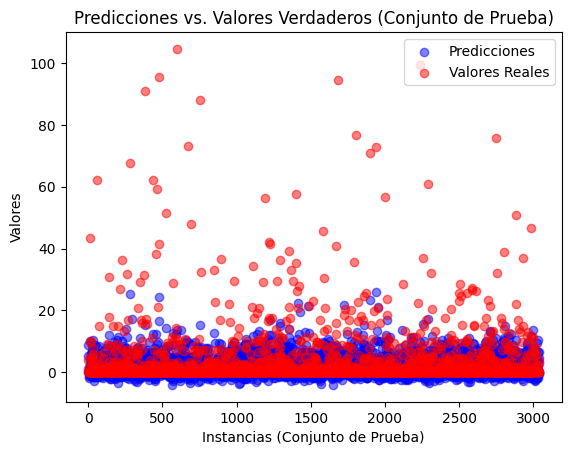

In [ ]:
x_test = range(len(Y_test))

plt.scatter(x_test, predictions, label='Predicciones', color='blue', alpha=0.5)
plt.scatter(x_test, Y_test, label='Valores Reales', color='red', alpha=0.5)

plt.xlabel('Instancias (Conjunto de Prueba)')
plt.ylabel('Valores')
plt.title('Predicciones vs. Valores Verdaderos (Conjunto de Prueba)')
plt.legend()
plt.show()

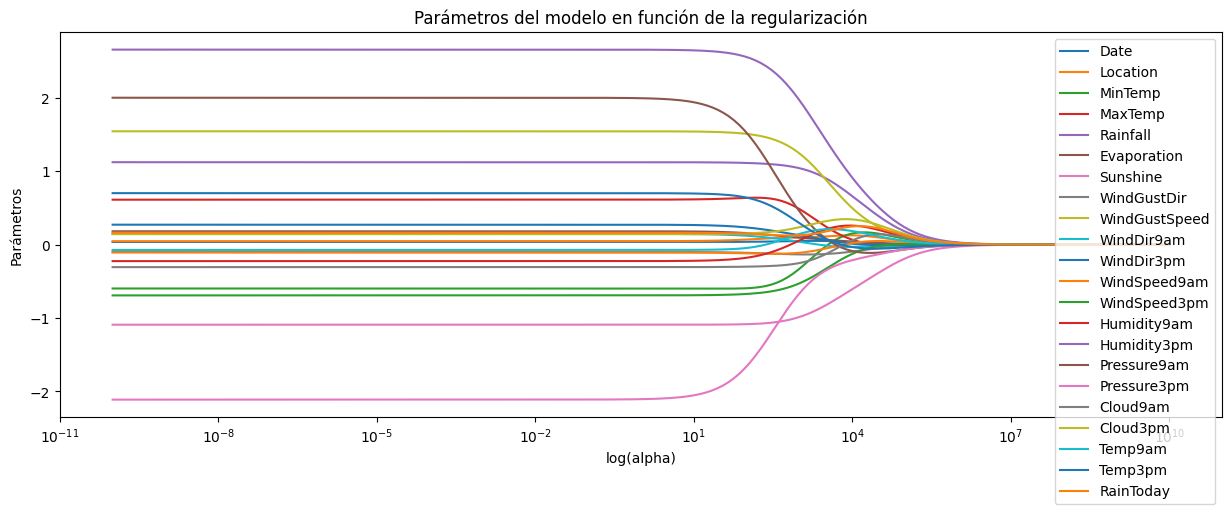

In [ ]:
# Evolución de los parámetros en función de alpha

alphas = modelo.steps[1][1].alphas
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
    modelo_aux.fit(X_train, Y_train)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('Parámetros')
ax.set_title('Parámetros del modelo en función de la regularización');
plt.axis('tight')
plt.legend()
plt.show()

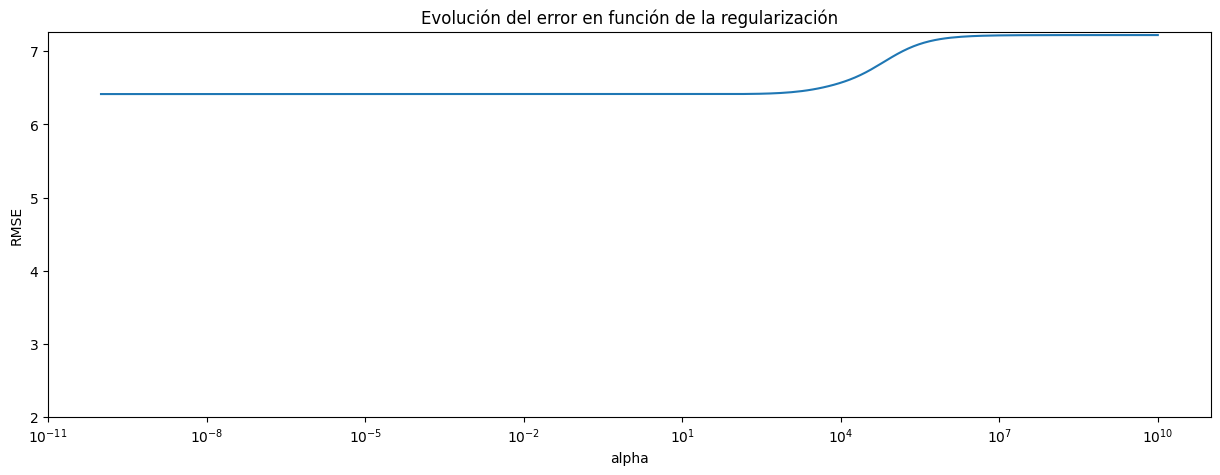

In [ ]:
# Evolución del error de validación cruzada en función de alpha

# modelo.cv_values almacena el MSE de CV para cada valor de alpha.

mod = modelo.steps[1][1]

mse_cv = mod.cv_values_.reshape((-1, 200)).mean(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = mod.alphas[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([2,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

In [ ]:
# Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado: {mod.alpha_}")

Mejor valor de alpha encontrado: 28.66067616948256


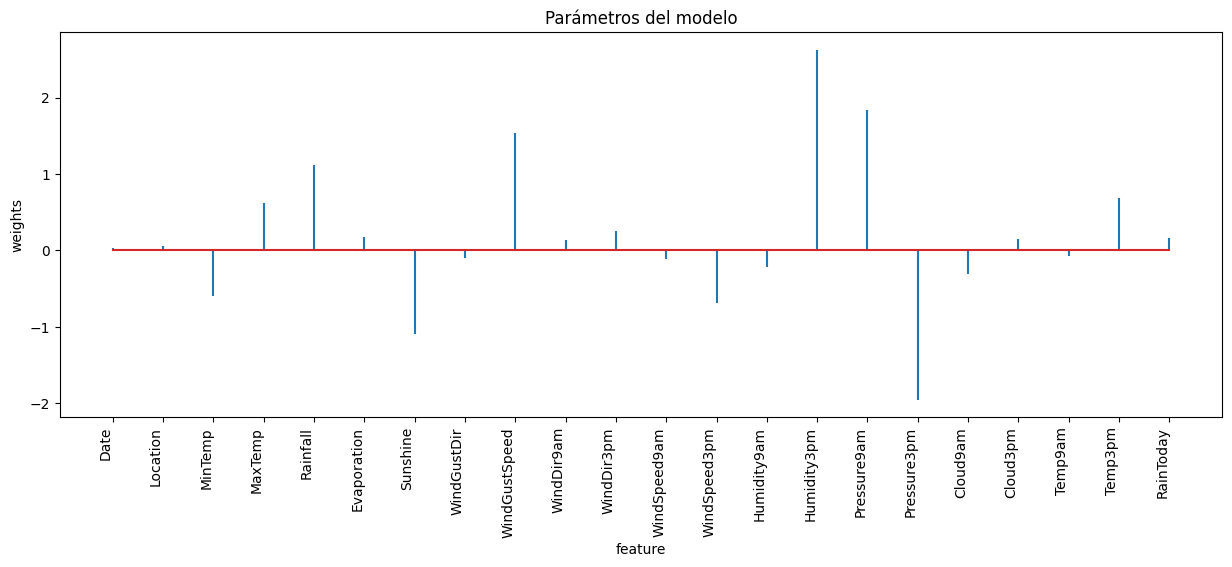

In [ ]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train.columns,'coef': mod.coef_.flatten()})

fig, ax = plt.subplots(figsize=(15,5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo');

In [ ]:
# Error de test del modelo

rmse_ridge = mean_squared_error(Y_test,
                predictions,
                squared = False
             )

print(f"El error (rmse) de test es: {rmse_ridge}")



El error (rmse) de test es: 6.986537334611489


## Lasso Regression


In [ ]:
modelo = make_pipeline(StandardScaler(),
                        LassoCV(
                           alphas=np.logspace(-10, 10, 200),
                           cv=10
                        )
         )

_ = modelo.fit(X_train, Y_train)


# realizar predicciones
predictions = modelo.predict(X_test)

# Calcular metricas
r2 = r2_score(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, predictions)
mape = np.mean(np.abs((Y_test - predictions) / Y_test)) * 100

# imprimir metricas
print(f'R2 Score: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

R2 Score: 0.24088426037668997
MSE: 48.79519812686985
RMSE: 6.98535597710452
MAE: 3.184682478391639
MAPE: inf


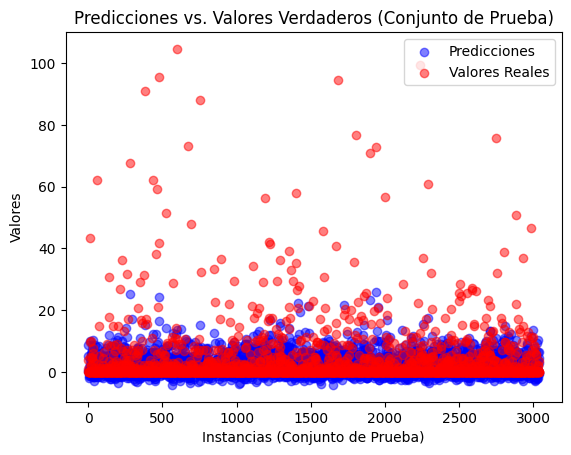

In [ ]:
x_test = range(len(Y_test))

plt.scatter(x_test, predictions, label='Predicciones', color='blue', alpha=0.5)
plt.scatter(x_test, Y_test, label='Valores Reales', color='red', alpha=0.5)

plt.xlabel('Instancias (Conjunto de Prueba)')
plt.ylabel('Valores')
plt.title('Predicciones vs. Valores Verdaderos (Conjunto de Prueba)')
plt.legend()
plt.show()

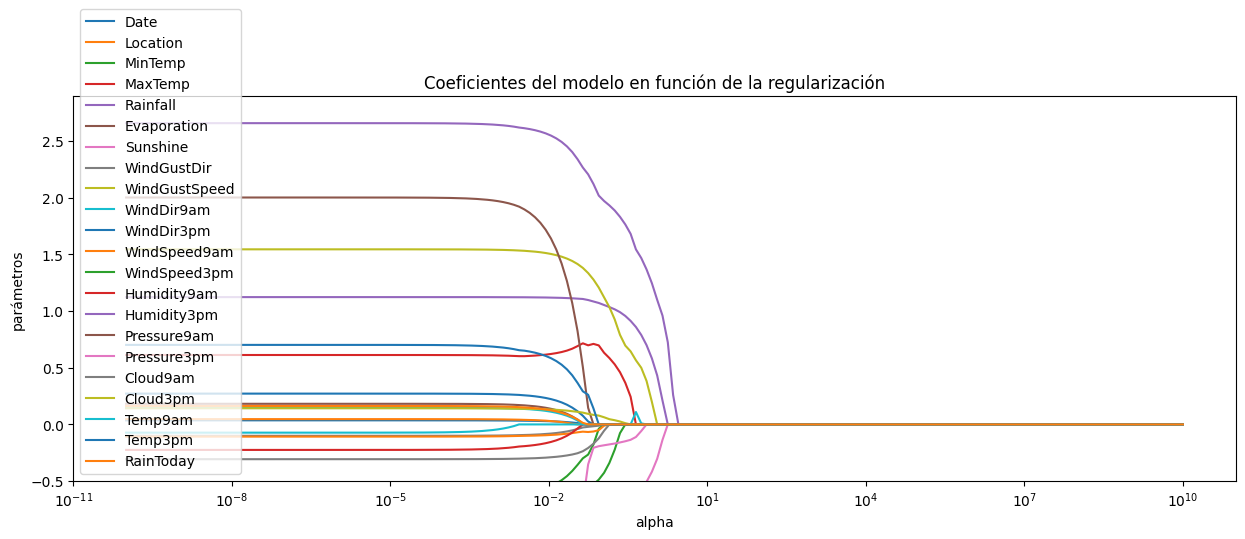

In [ ]:
# Evolución de los parámetros en función de alpha

mod = modelo.steps[1][1]

alphas = mod.alphas_
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
    modelo_aux.fit(X_train, Y_train)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('parámetros')
ax.legend()
ax.set_title('Coeficientes del modelo en función de la regularización')
plt.show()

Text(0.5, 1.0, 'Features incluidas en función de la regularización')

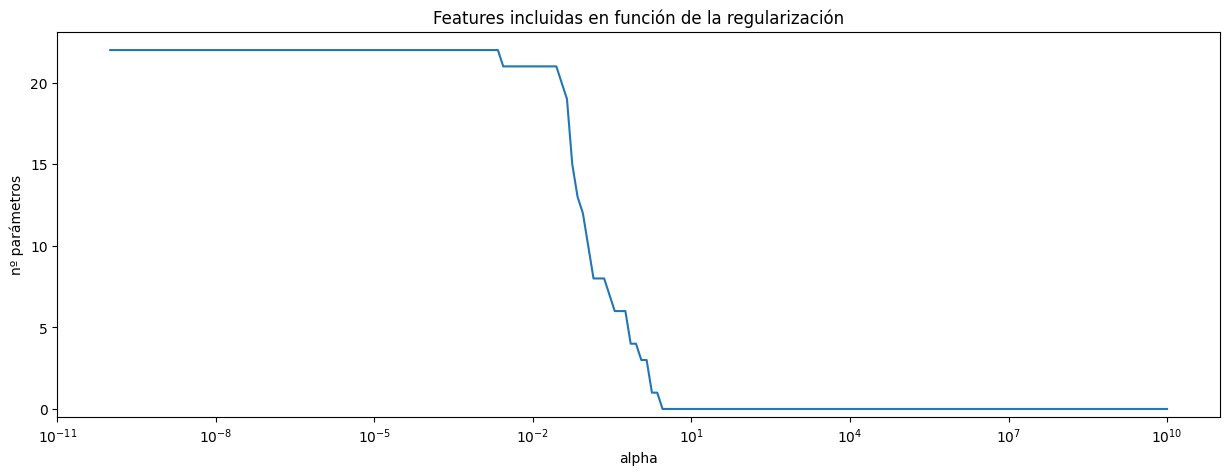

In [ ]:
# Número de features incluidas (parámetros !=0) en función de alpha
alphas = mod.alphas_
n_predictores = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
    modelo_aux.fit(X_train, Y_train)
    coef_no_cero = np.sum(modelo_aux.steps[1][1].coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº parámetros')
ax.set_title('Features incluidas en función de la regularización')

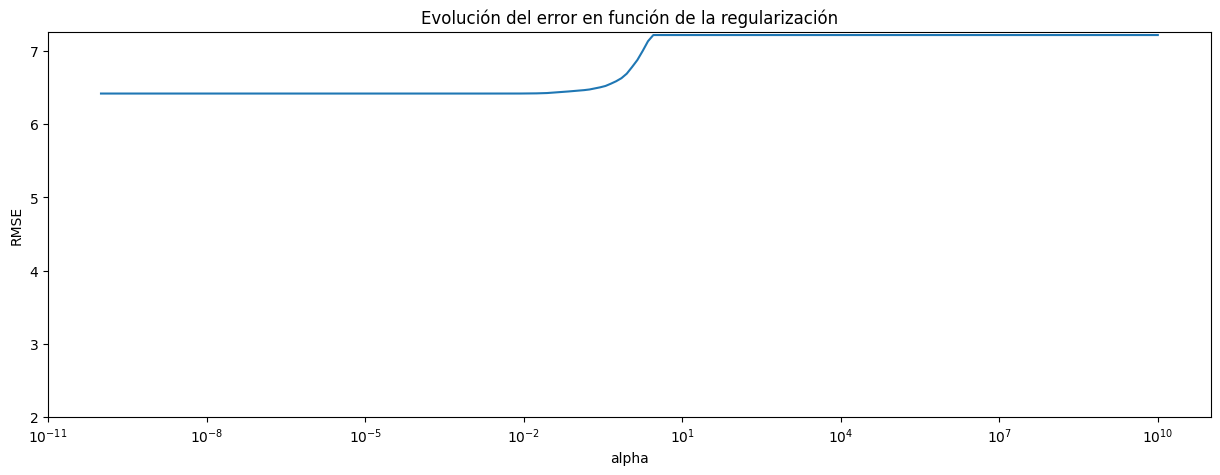

In [ ]:
# Evolución del error de validación cruzada en función de alpha

# modelo.mse_path almacena el MSE de CV para cada valor de alpha.

mse_cv = mod.mse_path_.mean(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = mod.alphas_[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas_, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([2,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

In [ ]:
# Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado: {mod.alpha_}")

Mejor valor de alpha encontrado: 0.0034489622604057598


In [ ]:
# Error de test del modelo

rmse_lasso = mean_squared_error(Y_test, predictions, squared = False)
print("")
print(f"El error (rmse) de test es: {rmse_lasso}")


El error (rmse) de test es: 6.98535597710452


## ElasticNet

In [ ]:
modelo = make_pipeline(StandardScaler(),
                        ElasticNetCV(
                              l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
                              alphas          = np.logspace(-10, 10, 200),
                              cv              = 10
                           )
         )

_ = modelo.fit(X_train, Y_train)

# Realizar predicciones
predictions = modelo.predict(X_test)

# Calcular metricas
r2 = r2_score(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, predictions)
mape = np.mean(np.abs((Y_test - predictions) / Y_test)) * 100

# Imprimir metricas
print(f'R2 Score: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

mod = modelo.steps[1][1]

R2 Score: 0.240393503380386
MSE: 48.82674349421882
RMSE: 6.987613576480801
MAE: 3.183353521213536
MAPE: inf


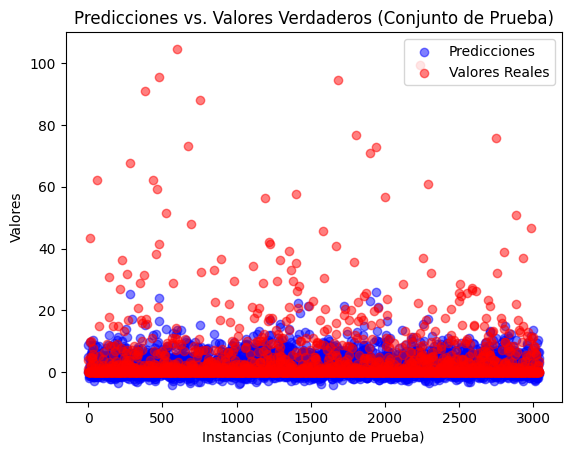

In [ ]:
x_test = range(len(Y_test))

plt.scatter(x_test, predictions, label='Predicciones', color='blue', alpha=0.5)
plt.scatter(x_test, Y_test, label='Valores Reales', color='red', alpha=0.5)

plt.xlabel('Instancias (Conjunto de Prueba)')
plt.ylabel('Valores')
plt.title('Predicciones vs. Valores Verdaderos (Conjunto de Prueba)')
plt.legend()
plt.show()

In [ ]:
# Error medio de las 10 particiones por cada valor de alpha y l1_ratio
mean_error_cv = mod.mse_path_.mean(axis =2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha) se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [mod.l1_ratio, mod.alphas_],
                                    names     = ['l1_ratio', 'mod.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv

l1_ratio   mod.alphas_     mse_cv   rmse_cv
124       0.00  3.448962e-03  41.205700  6.419167
324       0.10  3.448962e-03  41.205719  6.419168
125       0.00  2.736440e-03  41.205774  6.419172
325       0.10  2.736440e-03  41.205829  6.419177
323       0.10  4.347013e-03  41.205913  6.419183
...        ...           ...        ...       ...
1027      0.95  1.933892e+07  52.104333  7.218333
1028      0.95  1.534368e+07  52.104333  7.218333
1029      0.95  1.217383e+07  52.104333  7.218333
1023      0.95  4.880252e+07  52.104333  7.218333
1054      0.95  3.739937e+04  52.104333  7.218333

[1400 rows x 4 columns]

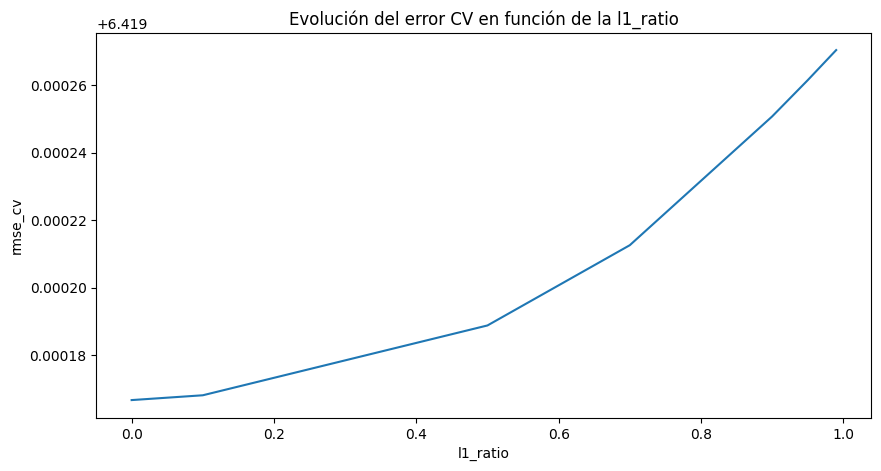

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv');

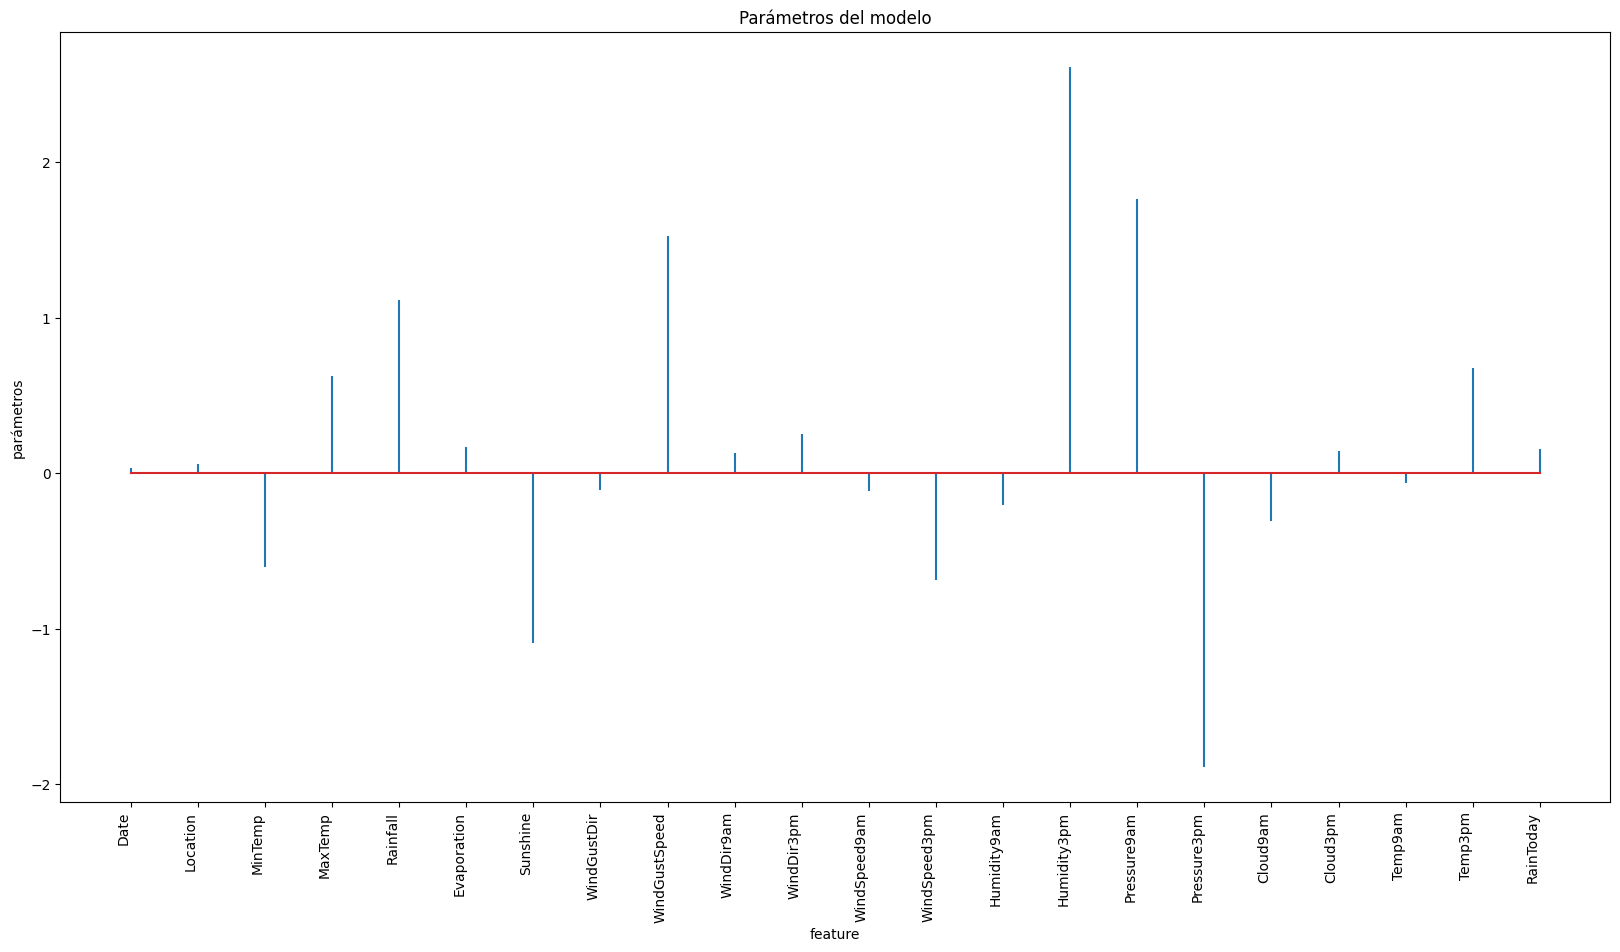

In [ ]:
# Parámetros del modelo
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': mod.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo');

In [ ]:
# Error de test del modelo

rmse_elastic = mean_squared_error(Y_test, predictions, squared = False)
print("")
print(f"El error (rmse) de test es: {rmse_elastic}")


El error (rmse) de test es: 6.987613576480801


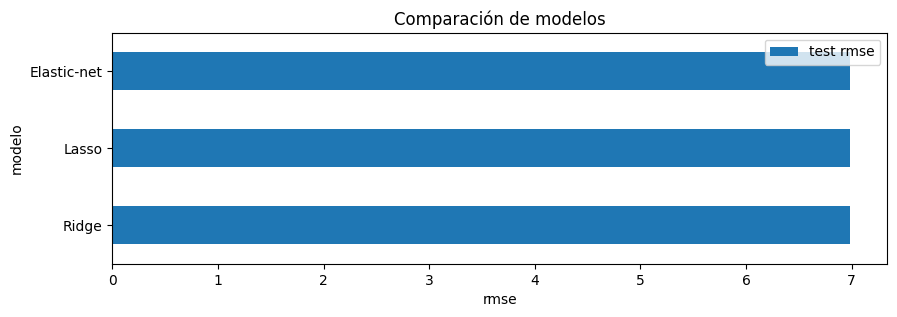

In [ ]:
# Comparacion entre modelos
df_comparacion = pd.DataFrame({
                    'modelo': ['Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [ rmse_ridge, rmse_lasso, rmse_elastic]
                 })

fig, ax = plt.subplots(figsize=(10, 3))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

In [ ]:
df_comparacion.head()

modelo  test rmse
0        Ridge   6.986537
1        Lasso   6.985356
2  Elastic-net   6.987614

#Regresion logistica

## Sin balance

In [ ]:
# Dividir los datos en conjunto de entrenamiento y de prueba
X_train, X_test, Y_train, Y_test = train_test_split(
    df_regresion,
    df_categorica['RainTomorrow'].values.reshape(-1, 1),
    test_size=0.2,
    random_state=12)

In [ ]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, Y_train)
Y_pred = logistic_model.predict(X_test)

print("Resultados con regresión logística\n")
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))


Resultados con regresión logística

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2351
           1       0.72      0.50      0.59       689

    accuracy                           0.84      3040
   macro avg       0.79      0.72      0.75      3040
weighted avg       0.83      0.84      0.83      3040

[[2215  136]
 [ 342  347]]


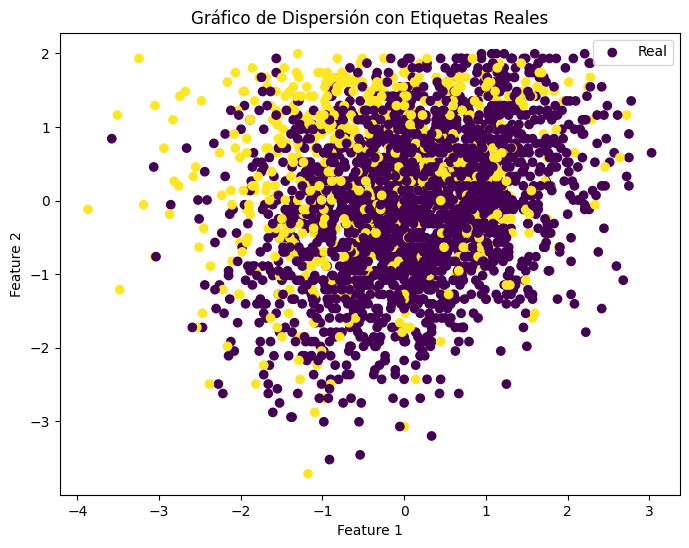

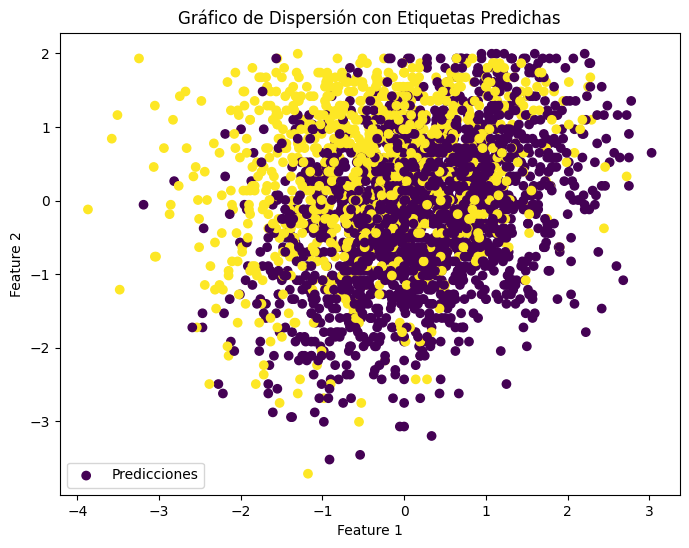

In [ ]:
# Predicciones del modelo
Y_pred = logistic_model.predict(X_test)

# Scatter plot de las características y las etiquetas reales
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Pressure3pm'], X_test['Humidity9am'], c=Y_test, cmap='viridis', label='Real')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gráfico de Dispersión con Etiquetas Reales')
plt.legend()
plt.show()

# Scatter plot de las características y las etiquetas predichas
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Pressure3pm'], X_test['Humidity9am'], c=Y_pred, cmap='viridis', label='Predicciones')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gráfico de Dispersión con Etiquetas Predichas')
plt.legend()
plt.show()

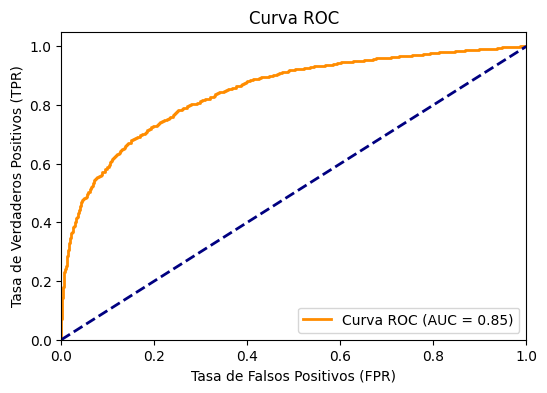

In [ ]:
# Obtengo las probabilidades de predicción del modelo
Y_probs = logistic_model.predict_proba(X_test)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(Y_test, Y_probs)
roc_auc = auc(fpr, tpr)

# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## Probando distintos balances

### Balance en el modelo

In [ ]:
logistic_model = LogisticRegression(random_state=42, class_weight='balanced')
logistic_model.fit(X_train, Y_train)
Y_pred = logistic_model.predict(X_test)

print("Resultados con regresión logística\n")
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

Resultados con regresión logística

              precision    recall  f1-score   support

           0       0.92      0.77      0.83      2351
           1       0.49      0.76      0.59       689

    accuracy                           0.77      3040
   macro avg       0.70      0.76      0.71      3040
weighted avg       0.82      0.77      0.78      3040

[[1803  548]
 [ 166  523]]


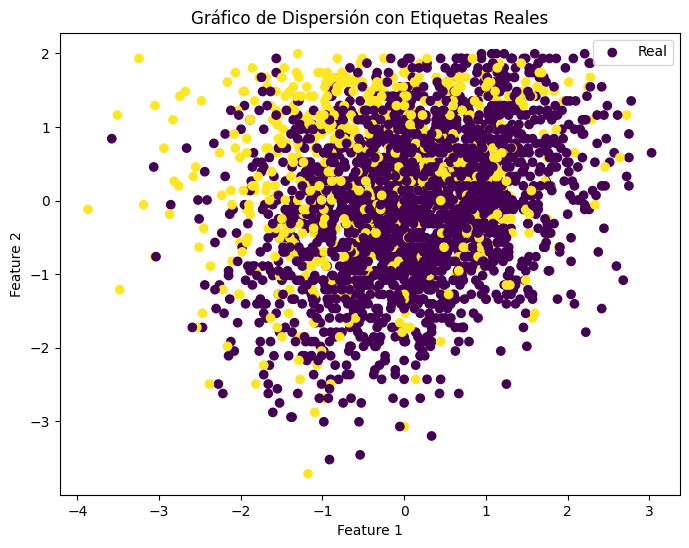

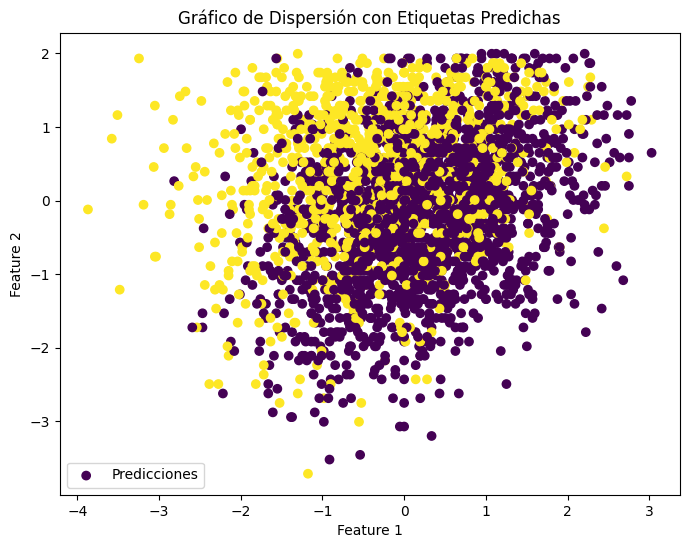

In [ ]:
# Predicciones del modelo
Y_pred = logistic_model.predict(X_test)

# Scatter plot de las características y las etiquetas reales
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Pressure3pm'], X_test['Humidity9am'], c=Y_test, cmap='viridis', label='Real')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gráfico de Dispersión con Etiquetas Reales')
plt.legend()
plt.show()

# Scatter plot de las características y las etiquetas predichas
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Pressure3pm'], X_test['Humidity9am'], c=Y_pred, cmap='viridis', label='Predicciones')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gráfico de Dispersión con Etiquetas Predichas')
plt.legend()
plt.show()

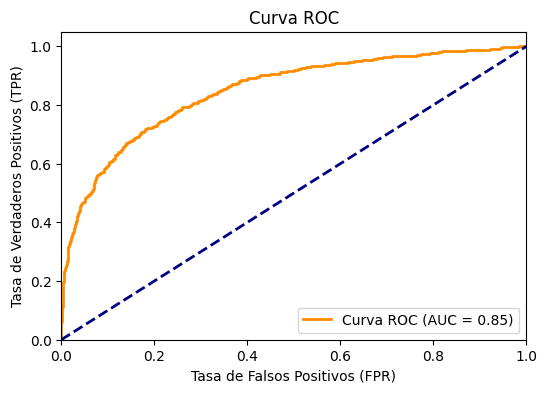

In [ ]:
# Obtengo las probabilidades de predicción del modelo
Y_probs = logistic_model.predict_proba(X_test)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(Y_test, Y_probs)
roc_auc = auc(fpr, tpr)

# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

### Balance SMOTE

In [ ]:
# Dividir los datos en conjunto de entrenamiento y de prueba
X_train, X_test, Y_train, Y_test = train_test_split(
    df_regresion,
    df_categorica['RainTomorrow'].values.reshape(-1, 1),
    test_size=0.2,
    random_state=12)

smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_resampled, Y_train_resampled)
Y_pred = logistic_model.predict(X_test)

print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))



              precision    recall  f1-score   support

           0       0.91      0.77      0.84      2351
           1       0.49      0.76      0.59       689

    accuracy                           0.77      3040
   macro avg       0.70      0.76      0.71      3040
weighted avg       0.82      0.77      0.78      3040

[[1807  544]
 [ 168  521]]


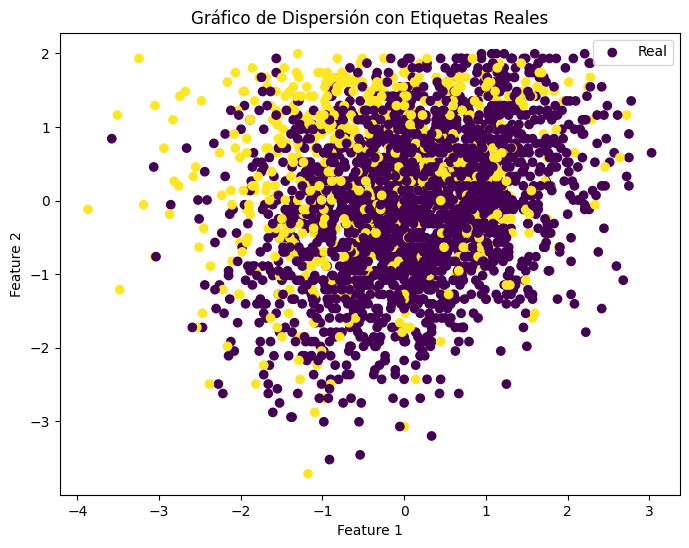

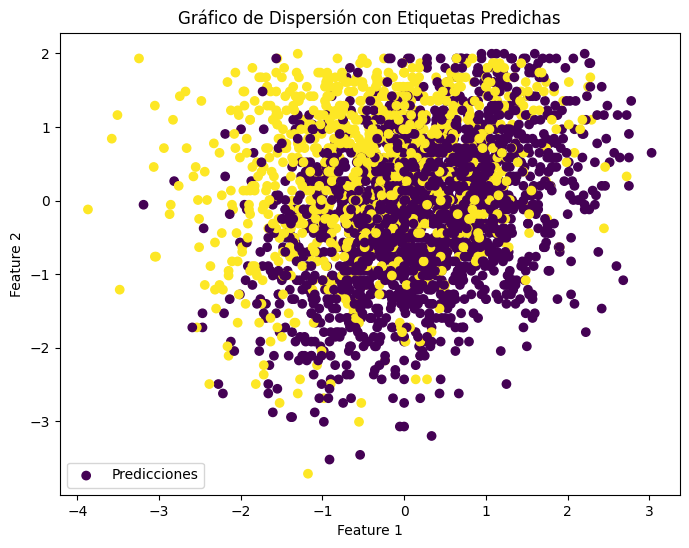

In [ ]:
# Predicciones del modelo
Y_pred = logistic_model.predict(X_test)

# Scatter plot de las características y las etiquetas reales
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Pressure3pm'], X_test['Humidity9am'], c=Y_test, cmap='viridis', label='Real')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gráfico de Dispersión con Etiquetas Reales')
plt.legend()
plt.show()

# Scatter plot de las características y las etiquetas predichas
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Pressure3pm'], X_test['Humidity9am'], c=Y_pred, cmap='viridis', label='Predicciones')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gráfico de Dispersión con Etiquetas Predichas')
plt.legend()
plt.show()

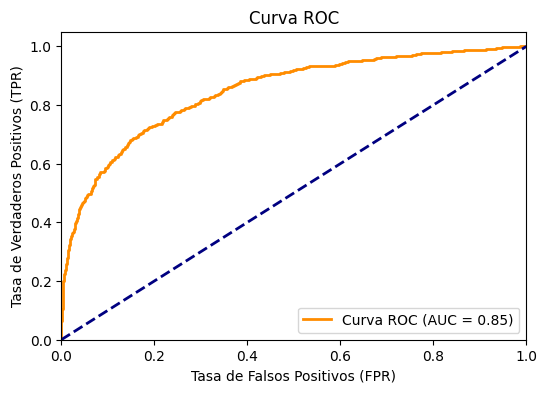

In [ ]:
# Obtengo las probabilidades de predicción del modelo
Y_probs = logistic_model.predict_proba(X_test)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(Y_test, Y_probs)
roc_auc = auc(fpr, tpr)

# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

### Balance oversampler

In [ ]:
# Dividir los datos en conjunto de entrenamiento y de prueba
X_train, X_test, Y_train, Y_test = train_test_split(
    df_regresion,
    df_categorica['RainTomorrow'].values.reshape(-1, 1),
    test_size=0.2,
    random_state=12)

oversampler = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = oversampler.fit_resample(X_train, Y_train)

logistic_model1 = LogisticRegression(random_state=42)
logistic_model1.fit(X_resampled, Y_resampled)
Y_pred = logistic_model1.predict(X_test)

print("Resultados regresión logística con Oversampling:\n")
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

Resultados regresión logística con Oversampling:

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      2351
           1       0.49      0.77      0.60       689

    accuracy                           0.77      3040
   macro avg       0.70      0.77      0.72      3040
weighted avg       0.82      0.77      0.78      3040

[[1804  547]
 [ 161  528]]


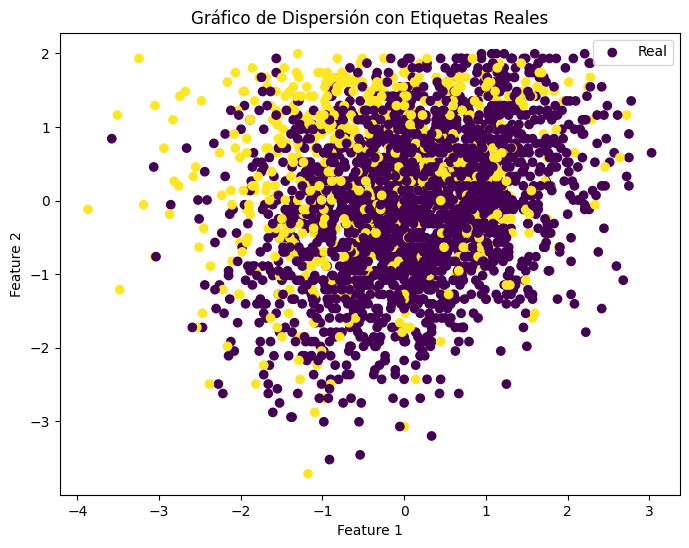

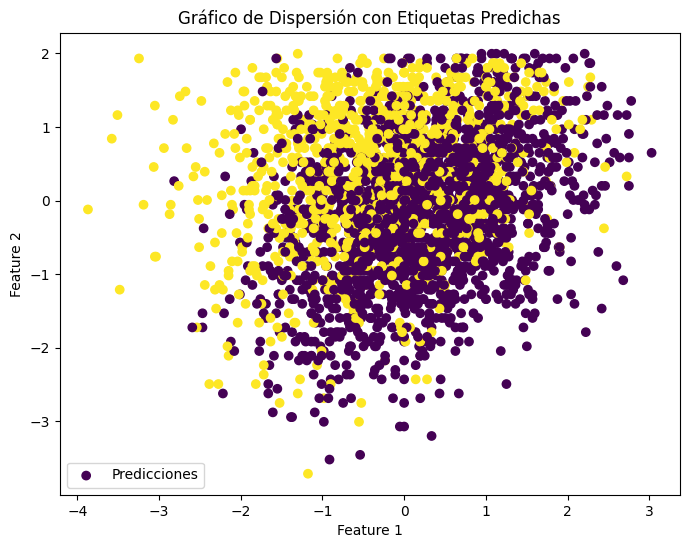

In [ ]:
# Predicciones del modelo
Y_pred = logistic_model.predict(X_test)

# Scatter plot de las características y las etiquetas reales
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Pressure3pm'], X_test['Humidity9am'], c=Y_test, cmap='viridis', label='Real')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gráfico de Dispersión con Etiquetas Reales')
plt.legend()
plt.show()

# Scatter plot de las características y las etiquetas predichas
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Pressure3pm'], X_test['Humidity9am'], c=Y_pred, cmap='viridis', label='Predicciones')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gráfico de Dispersión con Etiquetas Predichas')
plt.legend()
plt.show()

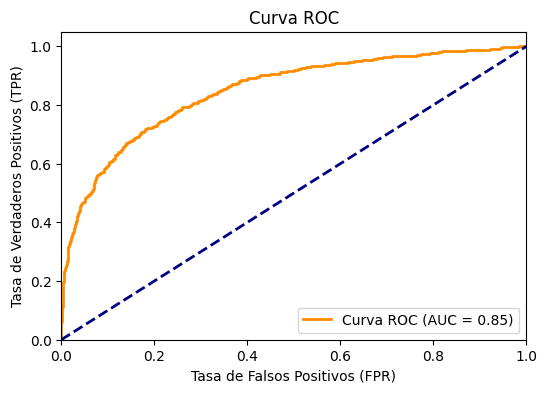

In [ ]:
# Obtengo las probabilidades de predicción del modelo
Y_probs = logistic_model.predict_proba(X_test)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(Y_test, Y_probs)
roc_auc = auc(fpr, tpr)

# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

#### NOTA
La diferencia entre los distintos metodos de balance de clases es muy baja

# PARTE 3
# Modelo BASE
## Regresion

In [ ]:
df_categorica.columns
x = np.array(df_regresion['Sunshine'])
y = np.array(df_categorica['RainfallTomorrow'])
print(len(y), len(x))
print(len(df_regresion['Sunshine']))

15199 15199
15199


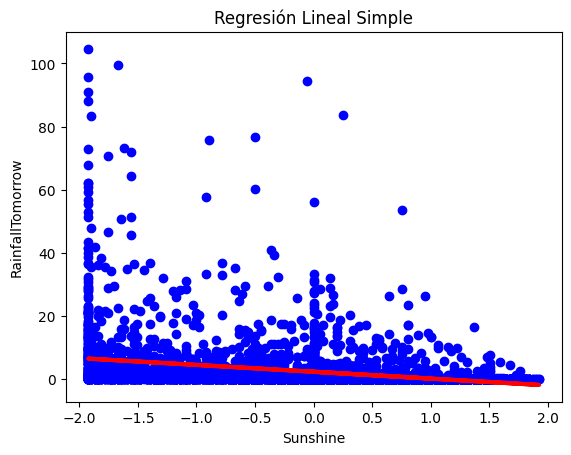

Error cuadrático medio en entrenamiento: 47.98702295555537
Error cuadrático medio en predicciones: 53.890473154448244
Error absoluto medio en predicciones: 3.303448703229444
Intercept: [2.31693319]
Coeficientes: [[-2.16577882]]
R2: 0.08484286882000747


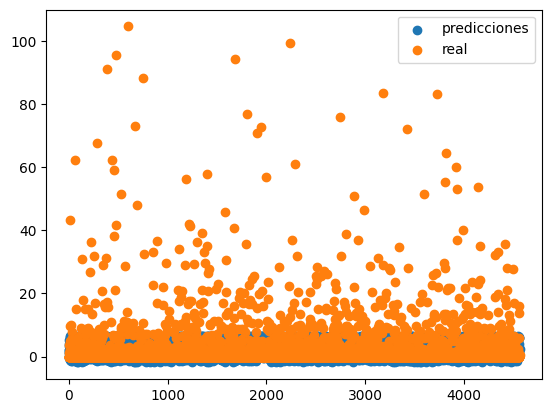

In [ ]:

# Extraer los valores de Sunshine y RainfallTomorrow
x = np.array(df_regresion['Sunshine']).reshape(-1, 1)
y = np.array(df_categorica['RainfallTomorrow']).reshape(-1, 1)

# Dividir los datos en conjunto de entrenamiento y de prueba
X_train, X_test, Y_train, Y_test = train_test_split(
    x,
    y,
    test_size=0.3,
    random_state=12)

# Crea y entrena el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, Y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Hacer predicciones sobre el conjunto de prueba
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)


# Visualiza los resultados
plt.scatter(X_test, Y_test, color='blue')
plt.plot(X_test, predictions_test, color='red', linewidth=3)
plt.xlabel('Sunshine')
plt.ylabel('RainfallTomorrow')
plt.title('Regresión Lineal Simple')
plt.show()




# Evaluar el modelo
print('Error cuadrático medio en entrenamiento:', metrics.mean_squared_error(Y_train, predictions_train))
print('Error cuadrático medio en predicciones:', metrics.mean_squared_error(Y_test, predictions_test))
print('Error absoluto medio en predicciones:', mean_absolute_error(Y_test, predictions_test))
print('Intercept:', model.intercept_)
print('Coeficientes:', model.coef_)
print('R2:', model.score(X_test, Y_test))

x=range(len(Y_test))
plt.scatter(x, y=predictions_test, label='predicciones')
plt.scatter(x, y=Y_test, label='real')
plt.legend()

## Clasificacion

Accuracy: 0.7259868421052632
Confusion Matrix:
 [[1746  605]
 [ 228  461]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.74      0.81      2351
           1       0.43      0.67      0.53       689

    accuracy                           0.73      3040
   macro avg       0.66      0.71      0.67      3040
weighted avg       0.78      0.73      0.74      3040



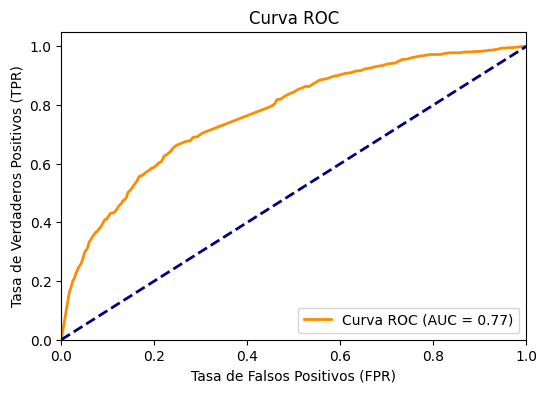

In [ ]:
# Dividir los datos en conjunto de entrenamiento y de prueba

X_train, X_test, Y_train, Y_test = train_test_split(
    df_regresion['Sunshine'].values.reshape(-1, 1),
    df_categorica['RainTomorrow'].values.reshape(-1, 1),
    test_size=0.2,
    random_state=12)

# Crea y entrena el modelo de regresión logística
model = LogisticRegression(random_state=42, class_weight='balanced')
model.fit(X_train, Y_train.ravel())  # Usar ravel() para evitar un warning y garantizar que sea un array unidimensional

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evalúa el rendimiento del modelo
accuracy = accuracy_score(Y_test, y_pred)  # Usar Y_test en lugar de y_test
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

# Obtengo las probabilidades de predicción del modelo
Y_probs = model.predict_proba(X_test)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(Y_test, Y_probs)
roc_auc = auc(fpr, tpr)

# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Redes neuronales

In [24]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.5 MB/s eta 0:00:00


In [26]:
import optuna
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score
from tensorflow import keras

# Dividir los datos en conjunto de entrenamiento y de prueba
X_train, X_test, Y_train, Y_test = train_test_split(
    df_regresion,
    df_categorica['RainTomorrow'].values.reshape(-1, 1),
    test_size=0.2,
    random_state=12)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define la función objetivo que Optuna tratará de maximizar
def objective(trial):
    # Define los parámetros a optimizar
    num_layers = trial.suggest_int('num_layers', 3, 4)
    num_neurons = trial.suggest_int('num_neurons', 128, 160, 32)

    # Construir el modelo
    model = keras.Sequential()
    model.add(keras.layers.Dense(num_neurons, activation='relu', input_shape=(X_train_scaled.shape[1],)))

    for _ in range(num_layers - 1):
        model.add(keras.layers.Dense(num_neurons, activation='relu'))

    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo
    model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=0)

    # Evaluar el modelo en el conjunto de prueba
    val_predictions = model.predict(X_test_scaled)
    predictions = (val_predictions > 0.5).astype(int)

    # Calcular métricas de clasificación binaria
    accuracy = accuracy_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)

    print(f'Accuracy en conjunto de prueba: {accuracy}')
    print(f'Precision en conjunto de prueba: {precision}')
    print(f'F1 Score en conjunto de prueba: {f1}')

    return accuracy

# Configurar el estudio de Optuna con enfoque bayesiano
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=10)  # Puedes ajustar el número de trials según tus recursos


[I 2023-11-22 19:14:01,154] A new study created in memory with name: no-name-65888de9-f0b1-4dc8-b6ab-e758f715478d


61/61 [==============================] - 0s 5ms/step


[I 2023-11-22 19:14:24,555] Trial 0 finished with value: 0.8468237704918032 and parameters: {'num_layers': 3, 'num_neurons': 160}. Best is trial 0 with value: 0.8468237704918032.


Accuracy en conjunto de prueba: 0.8468237704918032
Precision en conjunto de prueba: 0.699438202247191
F1 Score en conjunto de prueba: 0.6248431618569635
61/61 [==============================] - 0s 2ms/step


[I 2023-11-22 19:14:48,805] Trial 1 finished with value: 0.8396516393442623 and parameters: {'num_layers': 4, 'num_neurons': 160}. Best is trial 0 with value: 0.8468237704918032.


Accuracy en conjunto de prueba: 0.8396516393442623
Precision en conjunto de prueba: 0.6693121693121693
F1 Score en conjunto de prueba: 0.6178266178266177
61/61 [==============================] - 0s 3ms/step


[I 2023-11-22 19:15:10,451] Trial 2 finished with value: 0.8478483606557377 and parameters: {'num_layers': 4, 'num_neurons': 160}. Best is trial 2 with value: 0.8478483606557377.


Accuracy en conjunto de prueba: 0.8478483606557377
Precision en conjunto de prueba: 0.7045454545454546
F1 Score en conjunto de prueba: 0.6254728877679697
61/61 [==============================] - 0s 2ms/step


[I 2023-11-22 19:15:22,009] Trial 3 finished with value: 0.8370901639344263 and parameters: {'num_layers': 3, 'num_neurons': 128}. Best is trial 2 with value: 0.8478483606557377.


Accuracy en conjunto de prueba: 0.8370901639344263
Precision en conjunto de prueba: 0.6481927710843374
F1 Score en conjunto de prueba: 0.6285046728971962
61/61 [==============================] - 0s 2ms/step


[I 2023-11-22 19:15:31,572] Trial 4 finished with value: 0.8514344262295082 and parameters: {'num_layers': 3, 'num_neurons': 128}. Best is trial 4 with value: 0.8514344262295082.


Accuracy en conjunto de prueba: 0.8514344262295082
Precision en conjunto de prueba: 0.7227138643067846
F1 Score en conjunto de prueba: 0.6282051282051282
61/61 [==============================] - 0s 2ms/step


[I 2023-11-22 19:15:42,908] Trial 5 finished with value: 0.8473360655737705 and parameters: {'num_layers': 4, 'num_neurons': 160}. Best is trial 4 with value: 0.8514344262295082.


Accuracy en conjunto de prueba: 0.8473360655737705
Precision en conjunto de prueba: 0.7084548104956269
F1 Score en conjunto de prueba: 0.6198979591836735
61/61 [==============================] - 1s 2ms/step


[I 2023-11-22 19:15:54,597] Trial 6 finished with value: 0.850922131147541 and parameters: {'num_layers': 4, 'num_neurons': 128}. Best is trial 4 with value: 0.8514344262295082.


Accuracy en conjunto de prueba: 0.850922131147541
Precision en conjunto de prueba: 0.7130681818181818
F1 Score en conjunto de prueba: 0.6330390920554855
61/61 [==============================] - 0s 2ms/step


[I 2023-11-22 19:16:05,832] Trial 7 finished with value: 0.8452868852459017 and parameters: {'num_layers': 3, 'num_neurons': 160}. Best is trial 4 with value: 0.8514344262295082.


Accuracy en conjunto de prueba: 0.8452868852459017
Precision en conjunto de prueba: 0.6935933147632312
F1 Score en conjunto de prueba: 0.6224999999999999
61/61 [==============================] - 0s 2ms/step


[I 2023-11-22 19:16:14,838] Trial 8 finished with value: 0.8411885245901639 and parameters: {'num_layers': 3, 'num_neurons': 128}. Best is trial 4 with value: 0.8514344262295082.


Accuracy en conjunto de prueba: 0.8411885245901639
Precision en conjunto de prueba: 0.7235494880546075
F1 Score en conjunto de prueba: 0.5776566757493188
61/61 [==============================] - 0s 2ms/step


[I 2023-11-22 19:16:26,253] Trial 9 finished with value: 0.84375 and parameters: {'num_layers': 3, 'num_neurons': 128}. Best is trial 4 with value: 0.8514344262295082.


Accuracy en conjunto de prueba: 0.84375
Precision en conjunto de prueba: 0.6545454545454545
F1 Score en conjunto de prueba: 0.6538024971623154


## Buscar mejores hiperparametros y graficar metricas del mejor modelo

Mejor combinación de hiperparámetros: {'num_layers': 3, 'num_neurons': 128}
Número de parámetros: 36097
61/61 [==============================] - 0s 2ms/step
Accuracy en conjunto de test: 0.8524590163934426
Precision en conjunto de test: 0.7084468664850136
F1 Score en conjunto de test: 0.6435643564356436


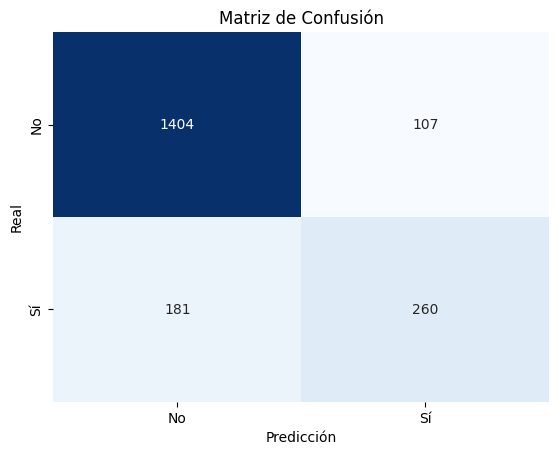

61/61 [==============================] - 0s 2ms/step


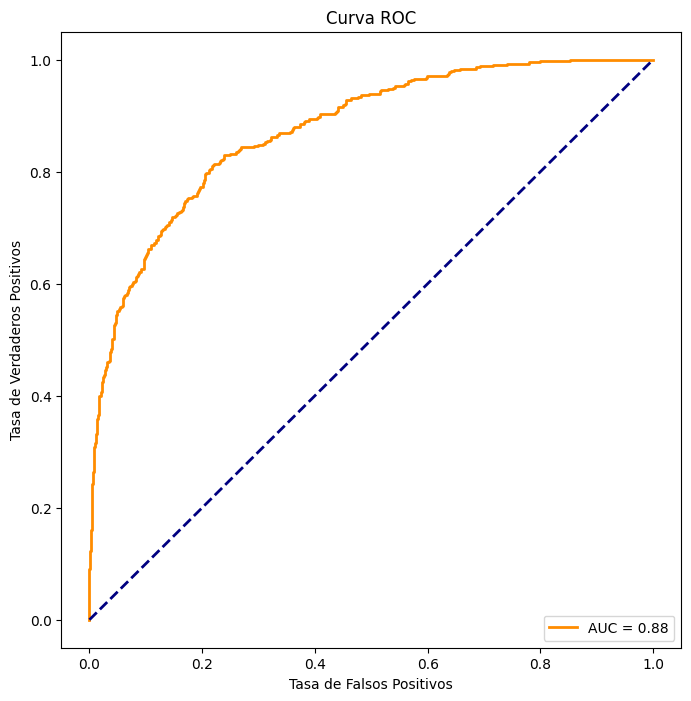

Accuracy: 0.8524590163934426
Confusion Matrix:
 [[1404  107]
 [ 181  260]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      1511
           1       0.71      0.59      0.64       441

    accuracy                           0.85      1952
   macro avg       0.80      0.76      0.78      1952
weighted avg       0.85      0.85      0.85      1952



In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener los mejores hiperparámetros
best_params = study.best_params
print(f'Mejor combinación de hiperparámetros: {best_params}')

# Construir la función para crear el modelo con los mejores hiperparámetros
def build_model(num_layers, num_neurons):
    model = keras.Sequential()
    model.add(keras.layers.Dense(num_neurons, activation='relu', input_shape=(X_train_scaled.shape[1],)))

    for _ in range(num_layers - 1):
        model.add(keras.layers.Dense(num_neurons, activation='relu'))

    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Entrenar el modelo final con los mejores hiperparámetros
best_model = build_model(num_layers=best_params['num_layers'], num_neurons=best_params['num_neurons'])

# Imprimir el número de parámetros del modelo
print("Número de parámetros:", best_model.count_params())

# Entrenar el modelo con el conjunto de entrenamiento completo
best_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=0)

# Evaluar el modelo final en el conjunto de prueba
test_predictions = best_model.predict(X_test_scaled)
predictions_test = (test_predictions > 0.5).astype(int)
accuracy = accuracy_score(Y_test, predictions_test)
f1 = f1_score(Y_test, predictions_test)
precision = precision_score(Y_test, predictions_test)

print(f'Accuracy en conjunto de test: {accuracy}')
print(f'Precision en conjunto de test: {precision}')
print(f'F1 Score en conjunto de test: {f1}')

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(Y_test, predictions_test)

# Visualizar la matriz de confusión con Seaborn
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Obtener las probabilidades de predicción del modelo
y_probs = best_model.predict(X_test_scaled)

# Calcular la tasa de falsos positivos, la tasa de verdaderos positivos y los umbrales
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Plotear la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Evaluar el rendimiento del modelo
y_pred = (y_probs > 0.5).astype(int)
accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)
